In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
print(os.listdir("../input"))
import gc

['merchants.csv', 'Data_Dictionary.xlsx', 'historical_transactions.csv', 'new_merchant_transactions.csv', 'sample_submission.csv', 'test.csv', 'train.csv']


In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
data_dict = pd.read_excel('../input/Data_Dictionary.xlsx')

In [3]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [4]:
test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


In [5]:
data_dict.head(8)

,train.csv,Unnamed: 1
0,NaN,NaN
1,Columns,Description
2,card_id,Unique card identifier
3,first_active_month,"'YYYY-MM', month of first purchase"
4,feature_1,Anonymized card categorical feature
5,feature_2,Anonymized card categorical feature
6,feature_3,Anonymized card categorical feature
7,target,Loyalty numerical score calculated 2 months af...


Lets first explore the train and test data

**The target variable 'Loyalty Score'**

In [6]:
train.target.describe()

count    201917.000000
mean         -0.393636
std           3.850500
min         -33.219281
25%          -0.883110
50%          -0.023437
75%           0.765453
max          17.965068
Name: target, dtype: float64

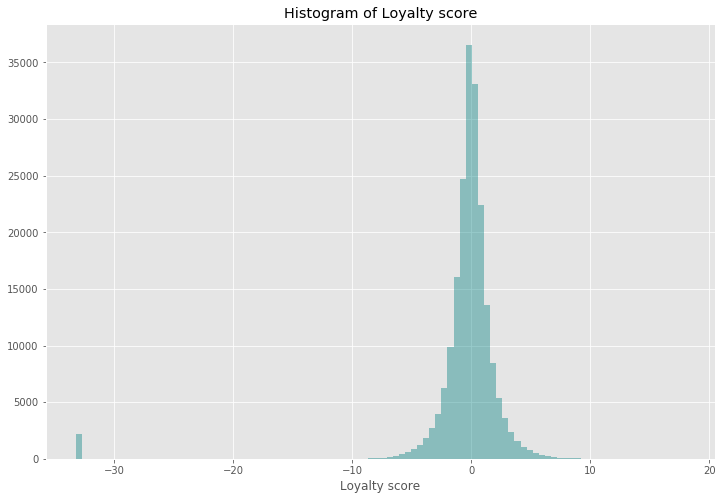

In [7]:
plt.figure(figsize=(12,8))
sns.distplot(train['target'].values, bins=100, kde=False, color="teal")
plt.title("Histogram of Loyalty score")
plt.xlabel('Loyalty score', fontsize=12)
plt.show()

In [8]:
len(train[train.target.values <= -30])

2207

In [9]:
(len(train[train.target.values <= -30])/train.shape[0])*100

1.0930233709890698

k* 1% of the target values are outliers
* Rest of the data if normally distributed

In [10]:
normal_target = train.target[train.target.values > -30]

In [11]:
print(f'mean of normal target values = {normal_target.mean()}')
print(f'median of normal target values = {normal_target.median()}')
print(f'standard deviation = {normal_target.std()}')

mean of normal target values = -0.03087931272485137
median of normal target values = -0.00778289
standard deviation = 1.7177929279593622


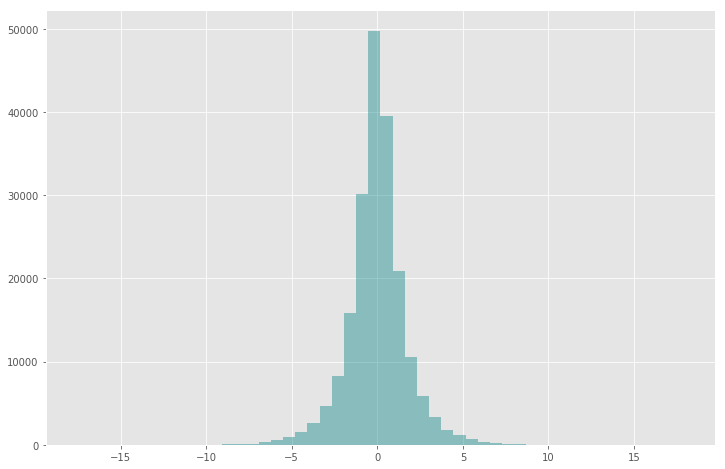

In [12]:
plt.figure(figsize=(12,8))
sns.distplot(normal_target.values, bins=50, kde=False, color="teal")
plt.show()

In [13]:
normal_target.describe()

count    199710.000000
mean         -0.030879
std           1.717793
min         -17.608147
25%          -0.844513
50%          -0.007783
75%           0.777331
max          17.965068
Name: target, dtype: float64

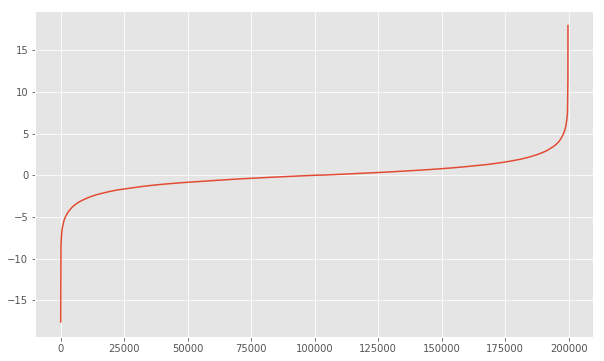

In [14]:
plt.figure(figsize=(10,6))
plt.plot(np.sort(normal_target))
plt.show()


* 50% of the data contains target values less than 0 and 50% more than zero

In [15]:
train['feature_1'].value_counts()

3    73573
2    55797
5    40625
4    19885
1    12037
Name: feature_1, dtype: int64

In [16]:
train['feature_2'].value_counts()

1    89242
2    74839
3    37836
Name: feature_2, dtype: int64

In [17]:
train['feature_3'].value_counts()

1    114198
0     87719
Name: feature_3, dtype: int64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


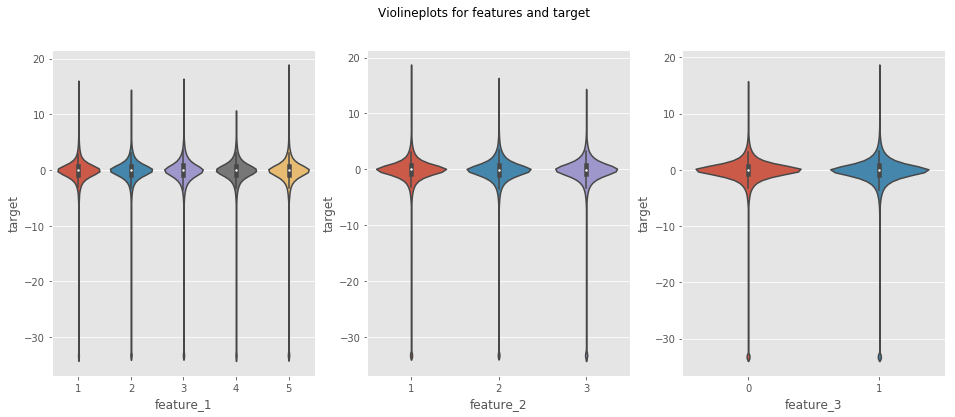

In [18]:
fig, ax = plt.subplots(1, 3, figsize = (16, 6))
plt.suptitle('Violineplots for features and target');
sns.violinplot(x="feature_1", y="target", data=train, ax=ax[0], title='feature_1');
sns.violinplot(x="feature_2", y="target", data=train, ax=ax[1], title='feature_2');
sns.violinplot(x="feature_3", y="target", data=train, ax=ax[2], title='feature_3');

**Historical Transaction**

In [19]:
his_tran = pd.read_csv('../input/historical_transactions.csv',parse_dates=True)
his_tran.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [20]:
his_tran.head(10)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37
5,Y,C_ID_4e6213e9bc,333,N,0,A,80,M_ID_50af771f8d,0,-0.734887,2018-02-24 08:45:05,1.0,9,37
6,Y,C_ID_4e6213e9bc,88,N,0,A,278,M_ID_5e8220e564,-11,-0.716855,2017-03-21 00:10:51,1.0,16,37
7,Y,C_ID_4e6213e9bc,3,N,0,A,80,M_ID_9d41786a50,-3,-0.657049,2017-11-18 20:05:55,1.0,16,37
8,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-8,-0.737967,2017-06-01 22:02:56,1.0,16,37
9,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_74ba14b5fc,-11,-0.715352,2017-03-16 15:41:22,1.0,16,37


*Authorized flag*

In [21]:
his_tran.authorized_flag.value_counts()

Y    26595452
N     2516909
Name: authorized_flag, dtype: int64

In [22]:
his_tran['authorized_flag'] = his_tran['authorized_flag'].apply(lambda x: 1 if x == 'Y' else 0)

In [23]:
his_tran.authorized_flag.value_counts()

1    26595452
0     2516909
Name: authorized_flag, dtype: int64

In [24]:
total = his_tran.authorized_flag.value_counts()[1]+his_tran.authorized_flag.value_counts()[0]
print(f'On average {his_tran.authorized_flag.value_counts()[1]/total} are authorized')

On average 0.9135450058482031 are authorized


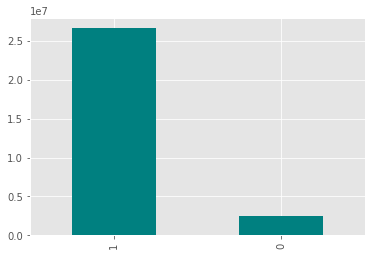

In [25]:
his_tran.authorized_flag.value_counts().plot(kind='bar',color='teal')

In [26]:
authorized_card_rate = his_tran.groupby(['card_id'])['authorized_flag'].mean().sort_values()
authorized_card_rate.head()

card_id
C_ID_744d26ea32    0.030488
C_ID_bb8dd137c9    0.037037
C_ID_e56202cd39    0.042105
C_ID_4feacff118    0.050000
C_ID_c27b4f80f7    0.054545
Name: authorized_flag, dtype: float64

In [27]:
authorized_card_rate.tail()

card_id
C_ID_d048b7cc60    1.0
C_ID_4e45fcdb43    1.0
C_ID_9f3ee1305e    1.0
C_ID_1b52a3e21b    1.0
C_ID_d3c3d988d5    1.0
Name: authorized_flag, dtype: float64

Some cards have very low authorized rate. These might be frauds.

In [28]:
his_tran.city_id.value_counts().sort_index()

-1      2478624
 1       108519
 2        17171
 3        42665
 4       212403
 6        24220
 7        22477
 8        89353
 9        21053
 10       33395
 11       92785
 12       96647
 13       32701
 14       64610
 16       11747
 17      971714
 18        9565
 19     1151077
 20      207650
 21      149278
 22       23707
 23       22236
 24       74184
 25      356757
 26        9845
 28       23586
 29       34057
 30       83598
 32        8382
 33       67797
         ...   
 314      99370
 315       3845
 316        149
 318      27786
 319       1645
 320      65485
 321       9808
 322     153926
 323      37486
 325      29257
 326       7912
 327       7499
 328      22886
 329      35343
 330      34942
 331     714414
 333     561144
 334      70606
 335      12474
 336       9022
 337      18568
 338      14757
 339      56509
 340     124669
 341      31500
 342      17622
 343      12113
 344     177694
 345      10424
 347      43617
Name: city_id, Length: 3

* There are 308 cities.
* Data shows an absurd city_id of -1. I think that might be the filled missing value but its count is almost 2.4 million

In [29]:
his_tran.groupby(['card_id','city_id','authorized_flag']).count().head(10)

category_1      ...       subsector_id
card_id         city_id authorized_flag                  ...                   
C_ID_00007093c1 -1      0                         4      ...                  4
                        1                        24      ...                 24
                 76     0                         5      ...                  5
                        1                        15      ...                 15
                 244    0                        26      ...                 26
                        1                        74      ...                 74
                 333    1                         1      ...                  1
C_ID_0001238066 -1      1                         8      ...                  8
                 19     1                         2      ...                  2
                 28     1                         1      ...                  1

[10 rows x 11 columns]

In [30]:
his_tran.groupby(['card_id','authorized_flag']).count().head(10)

city_id      ...       subsector_id
card_id         authorized_flag               ...                   
C_ID_00007093c1 0                     35      ...                 35
                1                    114      ...                114
C_ID_0001238066 0                      3      ...                  3
                1                    120      ...                120
C_ID_0001506ef0 0                      4      ...                  4
                1                     62      ...                 62
C_ID_0001793786 0                     27      ...                 27
                1                    189      ...                189
C_ID_000183fdda 0                      7      ...                  7
                1                    137      ...                137

[10 rows x 12 columns]

This -1 city has a good count of unauthorised transactions too but approx 1.9 million of authorised transactions. This tells it is not a good idea to think it as a unusable city.

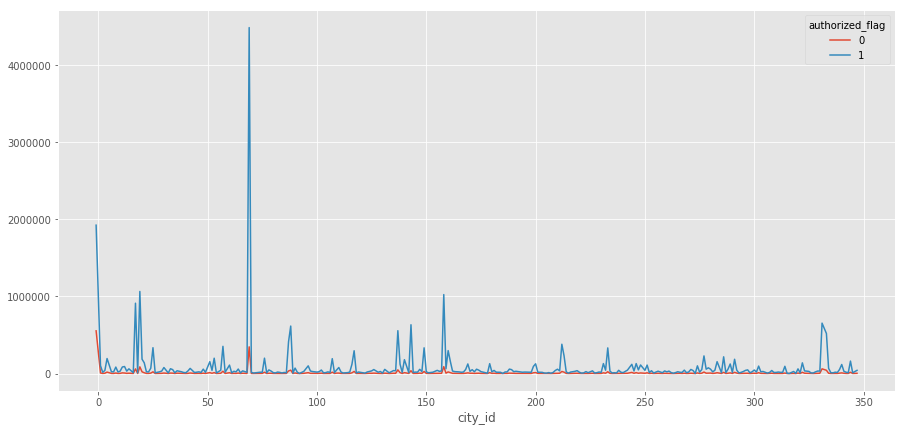

In [31]:
fig, ax = plt.subplots(figsize=(15,7))
his_tran.groupby(['city_id','authorized_flag']).count()['purchase_amount'].unstack().plot(ax = ax)

* The graphs shows the trends of authorised(1) and unauthorized(0) purchased in different cities.
* Clearly there are some cities with very high puchases and some with low purchases.
* Maybe cities with high purchases are probably with good market facilities.

In [32]:
his_tran.groupby(['city_id','authorized_flag']).mean().head(10)

installments      ...       subsector_id
city_id authorized_flag                    ...                   
-1      0                    2.061374      ...          18.310035
        1                    1.554714      ...          22.151141
 1      0                    0.874678      ...          27.881497
        1                    0.569937      ...          28.992161
 2      0                    0.815319      ...          23.990694
        1                    0.594903      ...          24.476607
 3      0                    0.663751      ...          27.501640
        1                    0.437306      ...          27.774425
 4      0                    0.792500      ...          25.576133
        1                    0.547734      ...          26.274243

[10 rows x 7 columns]

In [33]:
his_tran.groupby(['card_id']).mean().head(10)

,authorized_flag,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
card_id,,,,,,,,,
C_ID_00007093c1,0.765101,176.006711,1.288591,459.020134,-5.852349,-0.515739,3.016529,1.563758,20.120805
C_ID_0001238066,0.975610,233.113821,1.609756,435.008130,-1.813008,-0.589002,1.695652,10.121951,26.178862
C_ID_0001506ef0,0.939394,135.090909,0.015152,505.348485,-4.833333,-0.524271,2.939394,18.696970,25.954545
C_ID_0001793786,0.875000,164.407407,0.023148,468.495370,-3.328704,-0.170306,2.039216,9.138889,27.550926
C_ID_000183fdda,0.951389,153.750000,1.833333,424.395833,-2.451389,-0.478041,2.907143,3.409722,24.020833
C_ID_00024e244b,0.757143,92.385714,0.071429,521.228571,-6.342857,-0.593611,2.914286,7.085714,26.542857
C_ID_0002709b5a,0.917808,104.917808,1.767123,515.191781,-4.328767,-0.652870,2.611940,16.890411,25.013699
C_ID_00027503e2,0.571429,140.500000,0.000000,617.428571,-4.142857,-0.741025,2.857143,18.285714,31.738095
C_ID_000298032a,0.933333,171.266667,0.000000,654.000000,-4.100000,-0.533081,1.000000,9.233333,31.433333


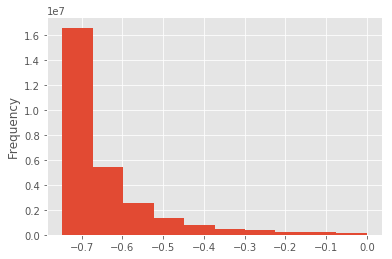

In [34]:
his_tran.loc[his_tran['purchase_amount']<0,'purchase_amount'].plot(kind='hist')

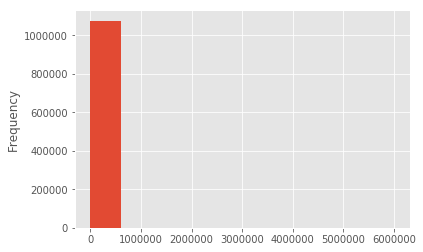

In [35]:
his_tran.loc[his_tran['purchase_amount']>0,'purchase_amount'].plot(kind='hist')

In [36]:
t_df = pd.merge(train,pd.DataFrame(his_tran.groupby(['card_id']).count()['purchase_amount']),on='card_id',how='left')
t_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,purchase_amount
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,260
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,350
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,43
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,77
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,133


In [37]:
t_df = t_df.rename({'purchase_amount':'purchase_count'}, axis='columns')

[]

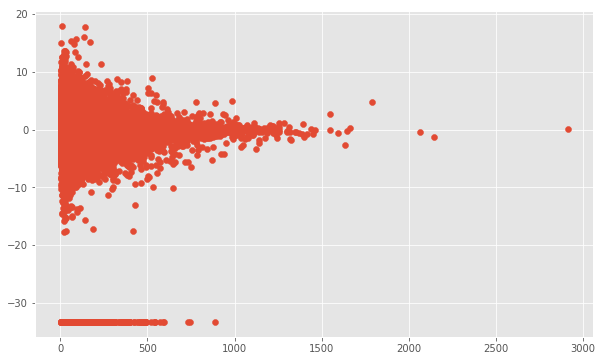

In [38]:
plt.figure(figsize=(10,6))
plt.scatter(t_df.purchase_count,t_df.target)
plt.plot()

In [39]:
t_df.purchase_count.value_counts()

15      2662
18      2595
20      2577
13      2523
14      2521
21      2517
16      2489
17      2472
19      2450
12      2449
22      2428
11      2392
23      2347
25      2328
28      2302
24      2271
26      2237
27      2208
10      2196
31      2185
9       2183
30      2151
29      2130
33      2053
32      2041
34      2001
35      1941
37      1903
36      1878
8       1860
        ... 
1634       1
957        1
1213       1
822        1
821        1
1171       1
817        1
915        1
787        1
941        1
686        1
942        1
871        1
2066       1
1042       1
1072       1
689        1
945        1
741        1
1073       1
946        1
913        1
947        1
1075       1
997        1
948        1
1142       1
1076       1
1204       1
1256       1
Name: purchase_count, Length: 1023, dtype: int64

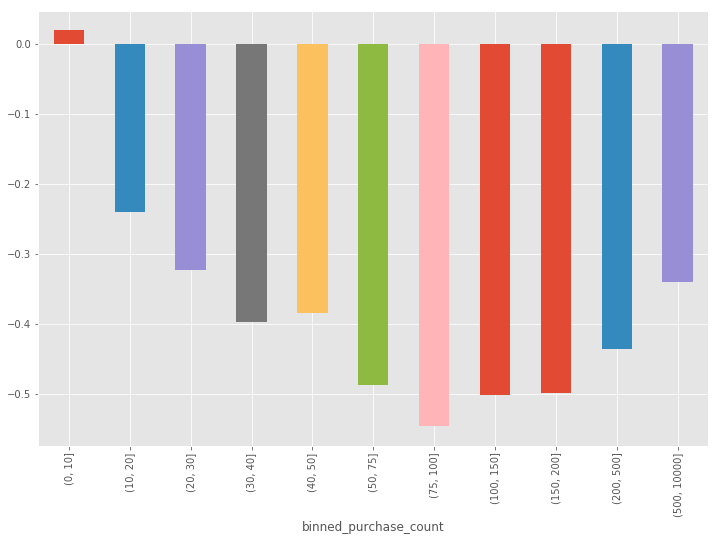

In [40]:
bins = [0, 10, 20, 30, 40, 50, 75, 100, 150, 200, 500, 10000]
t_df['binned_purchase_count'] = pd.cut(t_df['purchase_count'], bins)
cnt_srs = t_df.groupby("binned_purchase_count")['target'].mean()

plt.figure(figsize=(12,8))
cnt_srs.plot(kind='bar')

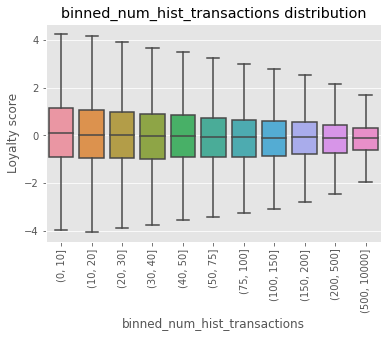

In [41]:
sns.boxplot(x=t_df["binned_purchase_count"], y=t_df['target'], data=t_df, showfliers=False)
plt.xticks(rotation='vertical')
plt.xlabel('binned_num_hist_transactions', fontsize=12)
plt.ylabel('Loyalty score', fontsize=12)
plt.title("binned_num_hist_transactions distribution")
plt.show()

**Installments**

In [42]:
his_tran.installments.describe()

count    2.911236e+07
mean     6.484954e-01
std      2.795577e+00
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      9.990000e+02
Name: installments, dtype: float64

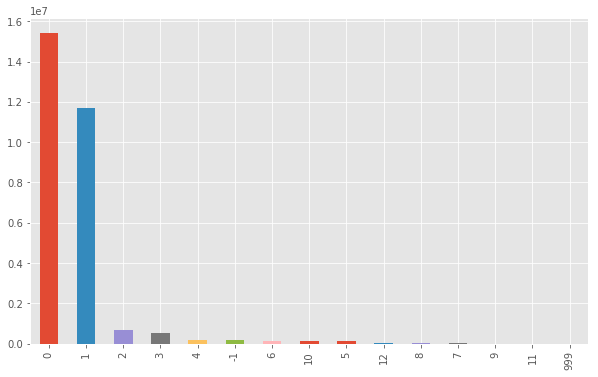

In [43]:
his_tran.installments.value_counts().plot(kind='bar',figsize=(10,6))

* Installments is an ordinal feature.
* Most of the transactions are with 0 or 1 installment
* There is a installment with value -999 maybe filled due to missing value

In [44]:
his_tran.groupby(['card_id']).sum()['installments'].head(10)

card_id
C_ID_00007093c1    192
C_ID_0001238066    198
C_ID_0001506ef0      1
C_ID_0001793786      5
C_ID_000183fdda    264
C_ID_00024e244b      5
C_ID_0002709b5a    129
C_ID_00027503e2      0
C_ID_000298032a      0
C_ID_0002ba3c2e      0
Name: installments, dtype: int64

In [45]:
t_df = pd.merge(t_df,pd.DataFrame(his_tran.groupby(['card_id']).sum()['installments']),on='card_id',how='left')
t_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,purchase_count,binned_purchase_count,installments
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,260,"(200, 500]",4
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,350,"(200, 500]",543
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,43,"(40, 50]",0
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,77,"(75, 100]",84
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,133,"(100, 150]",182


[]

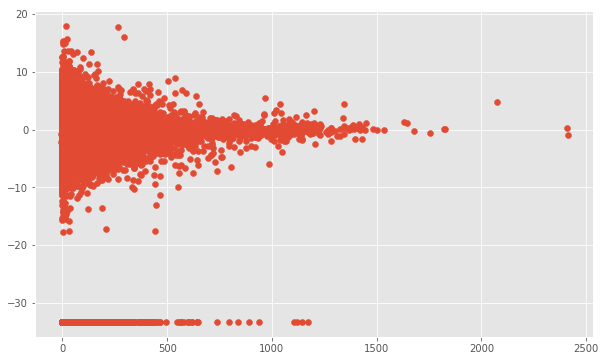

In [46]:
plt.figure(figsize=(10,6))
plt.scatter(x=t_df.installments,y=t_df.target)
plt.plot()

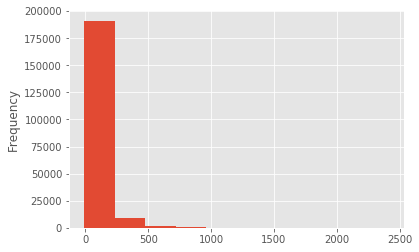

In [47]:
t_df.installments.plot(kind='hist')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


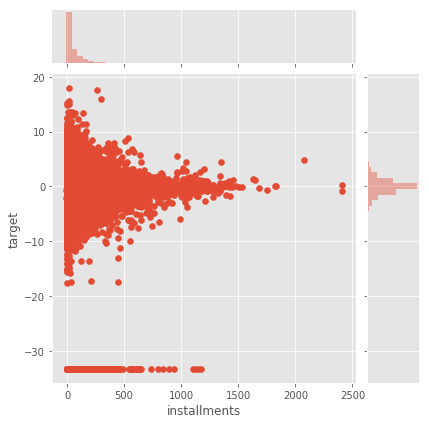

In [48]:
sns.jointplot(x=t_df.installments,y=t_df.target)

In [49]:
t_df = pd.merge(t_df,pd.DataFrame(his_tran.groupby(['card_id']).mean()['installments']),on='card_id',how='left')
t_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,purchase_count,binned_purchase_count,installments_x,installments_y
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,260,"(200, 500]",4,0.015385
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,350,"(200, 500]",543,1.551429
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,43,"(40, 50]",0,0.000000
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,77,"(75, 100]",84,1.090909
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,133,"(100, 150]",182,1.368421


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


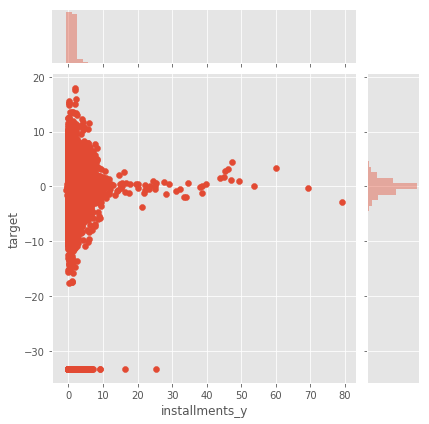

In [50]:
sns.jointplot(x=t_df.installments_y,y=t_df.target)

In [51]:
t_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,purchase_count,binned_purchase_count,installments_x,installments_y
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,260,"(200, 500]",4,0.015385
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,350,"(200, 500]",543,1.551429
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,43,"(40, 50]",0,0.000000
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,77,"(75, 100]",84,1.090909
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,133,"(100, 150]",182,1.368421


In [52]:
his_tran.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,1,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,1,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,1,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,1,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,1,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [53]:
his_tran.groupby(['card_id','authorized_flag']).count()['purchase_amount'].unstack().head()

authorized_flag,0,1
card_id,,
C_ID_00007093c1,35.0,114.0
C_ID_0001238066,3.0,120.0
C_ID_0001506ef0,4.0,62.0
C_ID_0001793786,27.0,189.0
C_ID_000183fdda,7.0,137.0


In [54]:
t_df = pd.merge(t_df,pd.DataFrame(his_tran.groupby(['card_id','authorized_flag']).count()['purchase_amount'].unstack()),on='card_id',how='left')
t_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,purchase_count,binned_purchase_count,installments_x,installments_y,0,1
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,260,"(200, 500]",4,0.015385,13.0,247.0
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,350,"(200, 500]",543,1.551429,11.0,339.0
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,43,"(40, 50]",0,0.000000,2.0,41.0
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,77,"(75, 100]",84,1.090909,NaN,77.0
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,133,"(100, 150]",182,1.368421,5.0,128.0


In [55]:
t_df = t_df.rename({0:'unauthorized_count'}, axis='columns')

In [56]:
t_df = t_df.rename({1:'authorized_count'}, axis='columns')

In [57]:
t_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,purchase_count,binned_purchase_count,installments_x,installments_y,unauthorized_count,authorized_count
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,260,"(200, 500]",4,0.015385,13.0,247.0
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,350,"(200, 500]",543,1.551429,11.0,339.0
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,43,"(40, 50]",0,0.000000,2.0,41.0
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,77,"(75, 100]",84,1.090909,NaN,77.0
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,133,"(100, 150]",182,1.368421,5.0,128.0


In [58]:
t_df.isnull().sum()

first_active_month           0
card_id                      0
feature_1                    0
feature_2                    0
feature_3                    0
target                       0
purchase_count               0
binned_purchase_count        0
installments_x               0
installments_y               0
unauthorized_count       30959
authorized_count             0
dtype: int64

In [59]:
t_df['unauthorized_count'].fillna(0.0,inplace=True)

In [60]:
t_df.isnull().sum()

first_active_month       0
card_id                  0
feature_1                0
feature_2                0
feature_3                0
target                   0
purchase_count           0
binned_purchase_count    0
installments_x           0
installments_y           0
unauthorized_count       0
authorized_count         0
dtype: int64

In [61]:
t_df = pd.merge(t_df,pd.DataFrame(his_tran.groupby(['card_id']).count()['city_id']),on='card_id',how='left')
t_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,purchase_count,binned_purchase_count,installments_x,installments_y,unauthorized_count,authorized_count,city_id
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,260,"(200, 500]",4,0.015385,13.0,247.0,260
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,350,"(200, 500]",543,1.551429,11.0,339.0,350
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,43,"(40, 50]",0,0.000000,2.0,41.0,43
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,77,"(75, 100]",84,1.090909,0.0,77.0,77
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,133,"(100, 150]",182,1.368421,5.0,128.0,133


In [62]:
t_df = pd.merge(t_df,pd.DataFrame(his_tran.groupby(['card_id']).sum()['purchase_amount']),on='card_id',how='left')
t_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,purchase_count,binned_purchase_count,installments_x,installments_y,unauthorized_count,authorized_count,city_id,purchase_amount
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,260,"(200, 500]",4,0.015385,13.0,247.0,260,-165.968739
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,350,"(200, 500]",543,1.551429,11.0,339.0,350,-210.006336
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,43,"(40, 50]",0,0.000000,2.0,41.0,43,-29.167391
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,77,"(75, 100]",84,1.090909,0.0,77.0,77,-49.491364
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,133,"(100, 150]",182,1.368421,5.0,128.0,133,-48.687656


## Category 1, 2 3

In [63]:
his_tran['category_1'].value_counts()

N    27028332
Y     2084029
Name: category_1, dtype: int64

In [64]:
his_tran.groupby(['card_id','category_1']).count().head()

authorized_flag      ...       subsector_id
card_id         category_1                       ...                   
C_ID_00007093c1 N                       121      ...                121
                Y                        28      ...                 28
C_ID_0001238066 N                       121      ...                121
                Y                         2      ...                  2
C_ID_0001506ef0 N                        66      ...                 66

[5 rows x 12 columns]

In [65]:
t_df = pd.merge(t_df,pd.DataFrame(his_tran[['card_id','category_1']].groupby(['card_id']).max()),on='card_id',how='left')
t_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,purchase_count,binned_purchase_count,installments_x,installments_y,unauthorized_count,authorized_count,city_id,purchase_amount,category_1
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,260,"(200, 500]",4,0.015385,13.0,247.0,260,-165.968739,N
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,350,"(200, 500]",543,1.551429,11.0,339.0,350,-210.006336,Y
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,43,"(40, 50]",0,0.000000,2.0,41.0,43,-29.167391,N
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,77,"(75, 100]",84,1.090909,0.0,77.0,77,-49.491364,Y
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,133,"(100, 150]",182,1.368421,5.0,128.0,133,-48.687656,Y


In [66]:
t_df = pd.merge(t_df,pd.DataFrame(his_tran.groupby(['card_id','category_1']).count()['authorized_flag'].unstack()),on='card_id',how='left')
t_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,purchase_count,binned_purchase_count,installments_x,installments_y,unauthorized_count,authorized_count,city_id,purchase_amount,category_1,N,Y
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,260,"(200, 500]",4,0.015385,13.0,247.0,260,-165.968739,N,260.0,NaN
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,350,"(200, 500]",543,1.551429,11.0,339.0,350,-210.006336,Y,319.0,31.0
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,43,"(40, 50]",0,0.000000,2.0,41.0,43,-29.167391,N,43.0,NaN
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,77,"(75, 100]",84,1.090909,0.0,77.0,77,-49.491364,Y,65.0,12.0
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,133,"(100, 150]",182,1.368421,5.0,128.0,133,-48.687656,Y,118.0,15.0


In [67]:
t_df.isnull().sum()

first_active_month            0
card_id                       0
feature_1                     0
feature_2                     0
feature_3                     0
target                        0
purchase_count                0
binned_purchase_count         0
installments_x                0
installments_y                0
unauthorized_count            0
authorized_count              0
city_id                       0
purchase_amount               0
category_1                    0
N                          2977
Y                        109887
dtype: int64

In [68]:
t_df['N'].fillna(0.0,inplace=True)
t_df['Y'].fillna(0.0,inplace=True)

In [69]:
his_tran['category_2'].value_counts()

1.0    15177199
3.0     3911795
5.0     3725915
4.0     2618053
2.0     1026535
Name: category_2, dtype: int64

In [70]:
t_df = pd.merge(t_df,pd.DataFrame(his_tran[['card_id','category_2']].groupby(['card_id']).max()),on='card_id',how='left')
t_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,purchase_count,binned_purchase_count,installments_x,installments_y,unauthorized_count,authorized_count,city_id,purchase_amount,category_1,N,Y,category_2
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,260,"(200, 500]",4,0.015385,13.0,247.0,260,-165.968739,N,260.0,0.0,5.0
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,350,"(200, 500]",543,1.551429,11.0,339.0,350,-210.006336,Y,319.0,31.0,1.0
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,43,"(40, 50]",0,0.000000,2.0,41.0,43,-29.167391,N,43.0,0.0,5.0
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,77,"(75, 100]",84,1.090909,0.0,77.0,77,-49.491364,Y,65.0,12.0,4.0
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,133,"(100, 150]",182,1.368421,5.0,128.0,133,-48.687656,Y,118.0,15.0,5.0


In [71]:
t_df = pd.merge(t_df,pd.DataFrame(his_tran.groupby(['card_id','category_2']).count()['authorized_flag'].unstack()),on='card_id',how='left')
t_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,purchase_count,binned_purchase_count,installments_x,installments_y,unauthorized_count,authorized_count,city_id,purchase_amount,category_1,N,Y,category_2,1.0,2.0,3.0,4.0,5.0
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,260,"(200, 500]",4,0.015385,13.0,247.0,260,-165.968739,N,260.0,0.0,5.0,257.0,NaN,NaN,NaN,3.0
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,350,"(200, 500]",543,1.551429,11.0,339.0,350,-210.006336,Y,319.0,31.0,1.0,319.0,NaN,NaN,NaN,NaN
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,43,"(40, 50]",0,0.000000,2.0,41.0,43,-29.167391,N,43.0,0.0,5.0,4.0,NaN,NaN,NaN,39.0
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,77,"(75, 100]",84,1.090909,0.0,77.0,77,-49.491364,Y,65.0,12.0,4.0,12.0,NaN,NaN,53.0,NaN
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,133,"(100, 150]",182,1.368421,5.0,128.0,133,-48.687656,Y,118.0,15.0,5.0,10.0,NaN,NaN,107.0,1.0


In [72]:
t_df[1.0].fillna(0.0,inplace=True)
t_df[2.0].fillna(0.0,inplace=True)
t_df[3.0].fillna(0.0,inplace=True)
t_df[4.0].fillna(0.0,inplace=True)

In [73]:
t_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,purchase_count,binned_purchase_count,installments_x,installments_y,unauthorized_count,authorized_count,city_id,purchase_amount,category_1,N,Y,category_2,1.0,2.0,3.0,4.0,5.0
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,260,"(200, 500]",4,0.015385,13.0,247.0,260,-165.968739,N,260.0,0.0,5.0,257.0,0.0,0.0,0.0,3.0
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,350,"(200, 500]",543,1.551429,11.0,339.0,350,-210.006336,Y,319.0,31.0,1.0,319.0,0.0,0.0,0.0,NaN
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,43,"(40, 50]",0,0.000000,2.0,41.0,43,-29.167391,N,43.0,0.0,5.0,4.0,0.0,0.0,0.0,39.0
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,77,"(75, 100]",84,1.090909,0.0,77.0,77,-49.491364,Y,65.0,12.0,4.0,12.0,0.0,0.0,53.0,NaN
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,133,"(100, 150]",182,1.368421,5.0,128.0,133,-48.687656,Y,118.0,15.0,5.0,10.0,0.0,0.0,107.0,1.0


In [74]:
t_df[5.0].fillna(0.0,inplace=True)

In [75]:
t_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,purchase_count,binned_purchase_count,installments_x,installments_y,unauthorized_count,authorized_count,city_id,purchase_amount,category_1,N,Y,category_2,1.0,2.0,3.0,4.0,5.0
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,260,"(200, 500]",4,0.015385,13.0,247.0,260,-165.968739,N,260.0,0.0,5.0,257.0,0.0,0.0,0.0,3.0
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,350,"(200, 500]",543,1.551429,11.0,339.0,350,-210.006336,Y,319.0,31.0,1.0,319.0,0.0,0.0,0.0,0.0
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,43,"(40, 50]",0,0.000000,2.0,41.0,43,-29.167391,N,43.0,0.0,5.0,4.0,0.0,0.0,0.0,39.0
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,77,"(75, 100]",84,1.090909,0.0,77.0,77,-49.491364,Y,65.0,12.0,4.0,12.0,0.0,0.0,53.0,0.0
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,133,"(100, 150]",182,1.368421,5.0,128.0,133,-48.687656,Y,118.0,15.0,5.0,10.0,0.0,0.0,107.0,1.0


In [76]:
his_tran['category_3'].value_counts()

A    15411747
B    11677522
C     1844933
Name: category_3, dtype: int64

In [77]:
his_tran['category_3'] = his_tran['category_3'].astype('category')

In [78]:
his_tran['category_3'] = his_tran['category_3'].cat.codes

In [79]:
type(his_tran['category_3'].iloc[0])

numpy.int8

In [80]:
t_df = pd.merge(t_df,pd.DataFrame(his_tran[['card_id','category_3']].groupby(['card_id']).max()),on='card_id',how='left')
t_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,purchase_count,binned_purchase_count,installments_x,installments_y,unauthorized_count,authorized_count,city_id,purchase_amount,category_1,N,Y,category_2,1.0,2.0,3.0,4.0,5.0,category_3
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,260,"(200, 500]",4,0.015385,13.0,247.0,260,-165.968739,N,260.0,0.0,5.0,257.0,0.0,0.0,0.0,3.0,1
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,350,"(200, 500]",543,1.551429,11.0,339.0,350,-210.006336,Y,319.0,31.0,1.0,319.0,0.0,0.0,0.0,0.0,2
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,43,"(40, 50]",0,0.000000,2.0,41.0,43,-29.167391,N,43.0,0.0,5.0,4.0,0.0,0.0,0.0,39.0,0
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,77,"(75, 100]",84,1.090909,0.0,77.0,77,-49.491364,Y,65.0,12.0,4.0,12.0,0.0,0.0,53.0,0.0,2
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,133,"(100, 150]",182,1.368421,5.0,128.0,133,-48.687656,Y,118.0,15.0,5.0,10.0,0.0,0.0,107.0,1.0,2


In [81]:
t_df = pd.merge(t_df,pd.DataFrame(his_tran.groupby(['card_id','category_3']).count()['authorized_flag'].unstack()),on='card_id',how='left')
t_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,purchase_count,binned_purchase_count,installments_x,installments_y,unauthorized_count,authorized_count,city_id,purchase_amount,category_1,N,Y,category_2,1.0_x,2.0_x,3.0,4.0,5.0,category_3,-1,0,1_y,2_y
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,260,"(200, 500]",4,0.015385,13.0,247.0,260,-165.968739,N,260.0,0.0,5.0,257.0,0.0,0.0,0.0,3.0,1,NaN,256.0,4.0,NaN
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,350,"(200, 500]",543,1.551429,11.0,339.0,350,-210.006336,Y,319.0,31.0,1.0,319.0,0.0,0.0,0.0,0.0,2,2.0,NaN,276.0,72.0
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,43,"(40, 50]",0,0.000000,2.0,41.0,43,-29.167391,N,43.0,0.0,5.0,4.0,0.0,0.0,0.0,39.0,0,NaN,43.0,NaN,NaN
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,77,"(75, 100]",84,1.090909,0.0,77.0,77,-49.491364,Y,65.0,12.0,4.0,12.0,0.0,0.0,53.0,0.0,2,2.0,NaN,68.0,7.0
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,133,"(100, 150]",182,1.368421,5.0,128.0,133,-48.687656,Y,118.0,15.0,5.0,10.0,0.0,0.0,107.0,1.0,2,NaN,NaN,126.0,7.0


In [82]:
t_df = pd.merge(t_df,pd.DataFrame(his_tran.groupby(['card_id']).sum()['month_lag']),on='card_id',how='left')
t_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,purchase_count,binned_purchase_count,installments_x,installments_y,unauthorized_count,authorized_count,city_id,purchase_amount,category_1,N,Y,category_2,1.0_x,2.0_x,3.0,4.0,5.0,category_3,-1,0,1_y,2_y,month_lag
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,260,"(200, 500]",4,0.015385,13.0,247.0,260,-165.968739,N,260.0,0.0,5.0,257.0,0.0,0.0,0.0,3.0,1,NaN,256.0,4.0,NaN,-1017
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,350,"(200, 500]",543,1.551429,11.0,339.0,350,-210.006336,Y,319.0,31.0,1.0,319.0,0.0,0.0,0.0,0.0,2,2.0,NaN,276.0,72.0,-1761
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,43,"(40, 50]",0,0.000000,2.0,41.0,43,-29.167391,N,43.0,0.0,5.0,4.0,0.0,0.0,0.0,39.0,0,NaN,43.0,NaN,NaN,-370
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,77,"(75, 100]",84,1.090909,0.0,77.0,77,-49.491364,Y,65.0,12.0,4.0,12.0,0.0,0.0,53.0,0.0,2,2.0,NaN,68.0,7.0,-218
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,133,"(100, 150]",182,1.368421,5.0,128.0,133,-48.687656,Y,118.0,15.0,5.0,10.0,0.0,0.0,107.0,1.0,2,NaN,NaN,126.0,7.0,-171


## Month Lag

In [83]:
his_tran['month_lag'].value_counts()

-2     3857276
-1     3627430
 0     3470946
-3     3095651
-4     2639805
-5     2364790
-6     2050048
-7     1769844
-8     1427846
-9     1234724
-10    1085053
-11    1007878
-12     791973
-13     689097
Name: month_lag, dtype: int64

In [84]:
his_tran[his_tran['month_lag']==0]['purchase_date']

5           2018-02-24 08:45:05
11          2018-02-08 20:05:45
16          2018-02-07 12:19:33
25          2018-02-26 14:54:38
30          2018-02-27 09:04:48
43          2018-02-24 10:52:32
54          2018-02-23 12:07:51
59          2018-02-09 12:18:56
64          2018-02-15 17:08:31
72          2018-02-18 14:15:17
80          2018-02-23 09:20:59
82          2018-02-25 12:07:37
88          2018-02-06 08:19:03
95          2018-02-04 13:43:21
133         2018-02-22 12:20:50
134         2018-02-20 10:58:17
138         2018-02-06 21:06:22
140         2018-02-26 12:55:44
152         2018-02-06 12:17:59
153         2018-02-10 12:30:44
157         2018-02-12 10:02:35
159         2018-02-06 12:00:39
161         2018-02-17 12:28:52
165         2018-02-21 19:06:20
167         2018-02-08 11:56:38
168         2018-02-20 10:57:50
189         2018-02-28 17:00:08
192         2018-02-17 10:49:42
194         2018-02-15 18:56:38
208         2018-02-22 16:56:36
                   ...         
29112250

In [85]:
t_df = pd.merge(t_df,pd.DataFrame(his_tran.groupby(['card_id','month_lag']).count()['authorized_flag'].unstack()),on='card_id',how='left')
t_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,purchase_count,binned_purchase_count,installments_x,installments_y,unauthorized_count,authorized_count,city_id,purchase_amount,category_1,N,Y,category_2,1.0_x,2.0_x,3.0,4.0,5.0,category_3,-1_x,0_x,1_y,2_y,month_lag,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1_y,0_y
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,260,"(200, 500]",4,0.015385,13.0,247.0,260,-165.968739,N,260.0,0.0,5.0,257.0,0.0,0.0,0.0,3.0,1,NaN,256.0,4.0,NaN,-1017,NaN,NaN,NaN,NaN,NaN,3.0,49.0,44.0,20.0,22.0,21.0,57.0,21.0,23.0
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,350,"(200, 500]",543,1.551429,11.0,339.0,350,-210.006336,Y,319.0,31.0,1.0,319.0,0.0,0.0,0.0,0.0,2,2.0,NaN,276.0,72.0,-1761,NaN,21.0,22.0,13.0,18.0,15.0,34.0,49.0,14.0,24.0,26.0,16.0,47.0,51.0
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,43,"(40, 50]",0,0.000000,2.0,41.0,43,-29.167391,N,43.0,0.0,5.0,4.0,0.0,0.0,0.0,39.0,0,NaN,43.0,NaN,NaN,-370,6.0,6.0,5.0,7.0,4.0,NaN,2.0,2.0,1.0,6.0,NaN,1.0,2.0,1.0
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,77,"(75, 100]",84,1.090909,0.0,77.0,77,-49.491364,Y,65.0,12.0,4.0,12.0,0.0,0.0,53.0,0.0,2,2.0,NaN,68.0,7.0,-218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,31.0,7.0,6.0,6.0,16.0
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,133,"(100, 150]",182,1.368421,5.0,128.0,133,-48.687656,Y,118.0,15.0,5.0,10.0,0.0,0.0,107.0,1.0,2,NaN,NaN,126.0,7.0,-171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,31.0,46.0,35.0


In [86]:
del authorized_card_rate

In [87]:
gc.collect()

8776

In [88]:
t_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,purchase_count,binned_purchase_count,installments_x,installments_y,unauthorized_count,authorized_count,city_id,purchase_amount,category_1,N,Y,category_2,1.0_x,2.0_x,3.0,4.0,5.0,category_3,-1_x,0_x,1_y,2_y,month_lag,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1_y,0_y
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,260,"(200, 500]",4,0.015385,13.0,247.0,260,-165.968739,N,260.0,0.0,5.0,257.0,0.0,0.0,0.0,3.0,1,NaN,256.0,4.0,NaN,-1017,NaN,NaN,NaN,NaN,NaN,3.0,49.0,44.0,20.0,22.0,21.0,57.0,21.0,23.0
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,350,"(200, 500]",543,1.551429,11.0,339.0,350,-210.006336,Y,319.0,31.0,1.0,319.0,0.0,0.0,0.0,0.0,2,2.0,NaN,276.0,72.0,-1761,NaN,21.0,22.0,13.0,18.0,15.0,34.0,49.0,14.0,24.0,26.0,16.0,47.0,51.0
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,43,"(40, 50]",0,0.000000,2.0,41.0,43,-29.167391,N,43.0,0.0,5.0,4.0,0.0,0.0,0.0,39.0,0,NaN,43.0,NaN,NaN,-370,6.0,6.0,5.0,7.0,4.0,NaN,2.0,2.0,1.0,6.0,NaN,1.0,2.0,1.0
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,77,"(75, 100]",84,1.090909,0.0,77.0,77,-49.491364,Y,65.0,12.0,4.0,12.0,0.0,0.0,53.0,0.0,2,2.0,NaN,68.0,7.0,-218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,31.0,7.0,6.0,6.0,16.0
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,133,"(100, 150]",182,1.368421,5.0,128.0,133,-48.687656,Y,118.0,15.0,5.0,10.0,0.0,0.0,107.0,1.0,2,NaN,NaN,126.0,7.0,-171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,31.0,46.0,35.0


In [89]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201917 entries, 0 to 201916
Data columns (total 43 columns):
first_active_month       201917 non-null object
card_id                  201917 non-null object
feature_1                201917 non-null int64
feature_2                201917 non-null int64
feature_3                201917 non-null int64
target                   201917 non-null float64
purchase_count           201917 non-null int64
binned_purchase_count    201917 non-null category
installments_x           201917 non-null int64
installments_y           201917 non-null float64
unauthorized_count       201917 non-null float64
authorized_count         201917 non-null float64
city_id                  201917 non-null int64
purchase_amount          201917 non-null float64
category_1               201917 non-null object
N                        201917 non-null float64
Y                        201917 non-null float64
category_2               198314 non-null float64
1.0_x                

In [90]:
t_df[-13].fillna(0.0,inplace=True)

In [91]:
ls = [-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,'-1_y','0_y']
for i in ls:
    t_df[i].fillna(0.0,inplace=True)

In [92]:
t_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,purchase_count,binned_purchase_count,installments_x,installments_y,unauthorized_count,authorized_count,city_id,purchase_amount,category_1,N,Y,category_2,1.0_x,2.0_x,3.0,4.0,5.0,category_3,-1_x,0_x,1_y,2_y,month_lag,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1_y,0_y
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,260,"(200, 500]",4,0.015385,13.0,247.0,260,-165.968739,N,260.0,0.0,5.0,257.0,0.0,0.0,0.0,3.0,1,NaN,256.0,4.0,NaN,-1017,0.0,0.0,0.0,0.0,0.0,3.0,49.0,44.0,20.0,22.0,21.0,57.0,21.0,23.0
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,350,"(200, 500]",543,1.551429,11.0,339.0,350,-210.006336,Y,319.0,31.0,1.0,319.0,0.0,0.0,0.0,0.0,2,2.0,NaN,276.0,72.0,-1761,0.0,21.0,22.0,13.0,18.0,15.0,34.0,49.0,14.0,24.0,26.0,16.0,47.0,51.0
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,43,"(40, 50]",0,0.000000,2.0,41.0,43,-29.167391,N,43.0,0.0,5.0,4.0,0.0,0.0,0.0,39.0,0,NaN,43.0,NaN,NaN,-370,6.0,6.0,5.0,7.0,4.0,0.0,2.0,2.0,1.0,6.0,0.0,1.0,2.0,1.0
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,77,"(75, 100]",84,1.090909,0.0,77.0,77,-49.491364,Y,65.0,12.0,4.0,12.0,0.0,0.0,53.0,0.0,2,2.0,NaN,68.0,7.0,-218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,31.0,7.0,6.0,6.0,16.0
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,133,"(100, 150]",182,1.368421,5.0,128.0,133,-48.687656,Y,118.0,15.0,5.0,10.0,0.0,0.0,107.0,1.0,2,NaN,NaN,126.0,7.0,-171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,31.0,46.0,35.0


In [93]:
ls = ['-1_x','0_x','1_y','2_y']
for i in ls:
    t_df[i].fillna(0.0,inplace=True)

In [94]:
t_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,purchase_count,binned_purchase_count,installments_x,installments_y,unauthorized_count,authorized_count,city_id,purchase_amount,category_1,N,Y,category_2,1.0_x,2.0_x,3.0,4.0,5.0,category_3,-1_x,0_x,1_y,2_y,month_lag,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1_y,0_y
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,260,"(200, 500]",4,0.015385,13.0,247.0,260,-165.968739,N,260.0,0.0,5.0,257.0,0.0,0.0,0.0,3.0,1,0.0,256.0,4.0,0.0,-1017,0.0,0.0,0.0,0.0,0.0,3.0,49.0,44.0,20.0,22.0,21.0,57.0,21.0,23.0
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,350,"(200, 500]",543,1.551429,11.0,339.0,350,-210.006336,Y,319.0,31.0,1.0,319.0,0.0,0.0,0.0,0.0,2,2.0,0.0,276.0,72.0,-1761,0.0,21.0,22.0,13.0,18.0,15.0,34.0,49.0,14.0,24.0,26.0,16.0,47.0,51.0
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,43,"(40, 50]",0,0.000000,2.0,41.0,43,-29.167391,N,43.0,0.0,5.0,4.0,0.0,0.0,0.0,39.0,0,0.0,43.0,0.0,0.0,-370,6.0,6.0,5.0,7.0,4.0,0.0,2.0,2.0,1.0,6.0,0.0,1.0,2.0,1.0
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,77,"(75, 100]",84,1.090909,0.0,77.0,77,-49.491364,Y,65.0,12.0,4.0,12.0,0.0,0.0,53.0,0.0,2,2.0,0.0,68.0,7.0,-218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,31.0,7.0,6.0,6.0,16.0
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,133,"(100, 150]",182,1.368421,5.0,128.0,133,-48.687656,Y,118.0,15.0,5.0,10.0,0.0,0.0,107.0,1.0,2,0.0,0.0,126.0,7.0,-171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,31.0,46.0,35.0


In [95]:
t_df.isnull().sum()

first_active_month          0
card_id                     0
feature_1                   0
feature_2                   0
feature_3                   0
target                      0
purchase_count              0
binned_purchase_count       0
installments_x              0
installments_y              0
unauthorized_count          0
authorized_count            0
city_id                     0
purchase_amount             0
category_1                  0
N                           0
Y                           0
category_2               3603
1.0_x                       0
2.0_x                       0
3.0                         0
4.0                         0
5.0                         0
category_3                  0
-1_x                        0
0_x                         0
1_y                         0
2_y                         0
month_lag                   0
-13                         0
-12                         0
-11                         0
-10                         0
-9        

In [96]:
t_df['category_2'].fillna(-1,inplace=True)

In [97]:
t_df.isnull().sum()

first_active_month       0
card_id                  0
feature_1                0
feature_2                0
feature_3                0
target                   0
purchase_count           0
binned_purchase_count    0
installments_x           0
installments_y           0
unauthorized_count       0
authorized_count         0
city_id                  0
purchase_amount          0
category_1               0
N                        0
Y                        0
category_2               0
1.0_x                    0
2.0_x                    0
3.0                      0
4.0                      0
5.0                      0
category_3               0
-1_x                     0
0_x                      0
1_y                      0
2_y                      0
month_lag                0
-13                      0
-12                      0
-11                      0
-10                      0
-9                       0
-8                       0
-7                       0
-6                       0
-

In [98]:
import lightgbm as lgb

In [99]:
t_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,purchase_count,binned_purchase_count,installments_x,installments_y,unauthorized_count,authorized_count,city_id,purchase_amount,category_1,N,Y,category_2,1.0_x,2.0_x,3.0,4.0,5.0,category_3,-1_x,0_x,1_y,2_y,month_lag,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1_y,0_y
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,260,"(200, 500]",4,0.015385,13.0,247.0,260,-165.968739,N,260.0,0.0,5.0,257.0,0.0,0.0,0.0,3.0,1,0.0,256.0,4.0,0.0,-1017,0.0,0.0,0.0,0.0,0.0,3.0,49.0,44.0,20.0,22.0,21.0,57.0,21.0,23.0
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,350,"(200, 500]",543,1.551429,11.0,339.0,350,-210.006336,Y,319.0,31.0,1.0,319.0,0.0,0.0,0.0,0.0,2,2.0,0.0,276.0,72.0,-1761,0.0,21.0,22.0,13.0,18.0,15.0,34.0,49.0,14.0,24.0,26.0,16.0,47.0,51.0
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,43,"(40, 50]",0,0.000000,2.0,41.0,43,-29.167391,N,43.0,0.0,5.0,4.0,0.0,0.0,0.0,39.0,0,0.0,43.0,0.0,0.0,-370,6.0,6.0,5.0,7.0,4.0,0.0,2.0,2.0,1.0,6.0,0.0,1.0,2.0,1.0
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,77,"(75, 100]",84,1.090909,0.0,77.0,77,-49.491364,Y,65.0,12.0,4.0,12.0,0.0,0.0,53.0,0.0,2,2.0,0.0,68.0,7.0,-218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,31.0,7.0,6.0,6.0,16.0
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,133,"(100, 150]",182,1.368421,5.0,128.0,133,-48.687656,Y,118.0,15.0,5.0,10.0,0.0,0.0,107.0,1.0,2,0.0,0.0,126.0,7.0,-171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,31.0,46.0,35.0


In [100]:
t_df.drop('binned_purchase_count',axis=1,inplace=True)

In [101]:
features = t_df.columns.drop(['first_active_month','card_id','target']).values

In [102]:
features

array(['feature_1', 'feature_2', 'feature_3', 'purchase_count',
       'installments_x', 'installments_y', 'unauthorized_count',
       'authorized_count', 'city_id', 'purchase_amount', 'category_1',
       'N', 'Y', 'category_2', '1.0_x', '2.0_x', 3.0, 4.0, 5.0,
       'category_3', '-1_x', '0_x', '1_y', '2_y', 'month_lag', -13, -12,
       -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, '-1_y', '0_y'],
      dtype=object)

In [103]:
t_df['category_1'] = t_df['category_1'].astype('category')

In [104]:
t_df['category_1'] = t_df['category_1'].cat.codes

In [105]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(t_df[features], t_df['target'], test_size = 0.25, random_state = 0)

In [106]:
d_train = lgb.Dataset(x_train, label=y_train)

In [107]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'rmse'
params['sub_feature'] = 0.78
params['num_leaves'] = 60
params['min_data'] = 79
params['max_depth'] = 15

In [108]:
clf = lgb.train(params, d_train, 2000)

In [109]:
from sklearn.metrics import mean_squared_error

In [110]:
y_pred = clf.predict(x_test)

In [111]:
mse = mean_squared_error(y_test, y_pred) 

In [112]:
print(mse)

14.482963889313046


In [113]:
print(mse**0.5)

3.8056489445708266


In [114]:
y_pred2 = clf.predict(x_train)

In [115]:
mse2 = mean_squared_error(y_train,y_pred2)

In [116]:
print(mse2**0.5)

3.6775348309173537


In [117]:
def add_features_to_test():
    t_df = pd.merge(test,pd.DataFrame(his_tran.groupby(['card_id']).count()['purchase_amount']),on='card_id',how='left')
    t_df = t_df.rename({'purchase_amount':'purchase_count'}, axis='columns')
    t_df = pd.merge(t_df,pd.DataFrame(his_tran.groupby(['card_id']).sum()['installments']),on='card_id',how='left')
    t_df = pd.merge(t_df,pd.DataFrame(his_tran.groupby(['card_id']).mean()['installments']),on='card_id',how='left')
    t_df = pd.merge(t_df,pd.DataFrame(his_tran.groupby(['card_id','authorized_flag']).count()['purchase_amount'].unstack()),on='card_id',how='left')
    t_df = t_df.rename({0:'unauthorized_count'}, axis='columns')
    t_df = t_df.rename({1:'authorized_count'}, axis='columns')
    t_df['unauthorized_count'].fillna(0.0,inplace=True)
    t_df = pd.merge(t_df,pd.DataFrame(his_tran.groupby(['card_id']).count()['city_id']),on='card_id',how='left')
    t_df = pd.merge(t_df,pd.DataFrame(his_tran.groupby(['card_id']).sum()['purchase_amount']),on='card_id',how='left')
    t_df = pd.merge(t_df,pd.DataFrame(his_tran[['card_id','category_1']].groupby(['card_id']).max()),on='card_id',how='left')
    t_df = pd.merge(t_df,pd.DataFrame(his_tran.groupby(['card_id','category_1']).count()['authorized_flag'].unstack()),on='card_id',how='left')
    t_df['N'].fillna(0.0,inplace=True)
    t_df['Y'].fillna(0.0,inplace=True)
    t_df = pd.merge(t_df,pd.DataFrame(his_tran[['card_id','category_2']].groupby(['card_id']).max()),on='card_id',how='left')
    t_df = pd.merge(t_df,pd.DataFrame(his_tran.groupby(['card_id','category_2']).count()['authorized_flag'].unstack()),on='card_id',how='left')
    t_df[1.0].fillna(0.0,inplace=True)
    t_df[2.0].fillna(0.0,inplace=True)
    t_df[3.0].fillna(0.0,inplace=True)
    t_df[4.0].fillna(0.0,inplace=True)
    t_df[5.0].fillna(0.0,inplace=True)
    t_df = pd.merge(t_df,pd.DataFrame(his_tran[['card_id','category_3']].groupby(['card_id']).max()),on='card_id',how='left')
    t_df = pd.merge(t_df,pd.DataFrame(his_tran.groupby(['card_id','category_3']).count()['authorized_flag'].unstack()),on='card_id',how='left')
    t_df = pd.merge(t_df,pd.DataFrame(his_tran.groupby(['card_id']).sum()['month_lag']),on='card_id',how='left')
    t_df = pd.merge(t_df,pd.DataFrame(his_tran.groupby(['card_id','month_lag']).count()['authorized_flag'].unstack()),on='card_id',how='left')
    t_df[-13].fillna(0.0,inplace=True)
    ls = [-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,'-1_y','0_y']
    for i in ls:
        t_df[i].fillna(0.0,inplace=True)
    ls = ['-1_x','0_x','1_y','2_y']
    for i in ls:
        t_df[i].fillna(0.0,inplace=True)
    t_df['category_2'].fillna(-1,inplace=True)
    return t_df

In [118]:
test_tdf = add_features_to_test()

In [119]:
test_tdf.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,purchase_count,installments_x,installments_y,unauthorized_count,authorized_count,city_id,purchase_amount,category_1,N,Y,category_2,1.0_x,2.0_x,3.0,4.0,5.0,category_3,-1_x,0_x,1_y,2_y,month_lag,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1_y,0_y
0,2017-04,C_ID_0ab67a22ab,3,3,1,68,141,2.073529,24.0,44.0,68,-40.733733,Y,45.0,23.0,1.0,45.0,0.0,0.0,0.0,0.0,2,0.0,0.0,46.0,22.0,-247,0.0,0.0,0.0,0.0,0.0,4.0,6.0,11.0,2.0,11.0,9.0,11.0,4.0,10.0
1,2017-01,C_ID_130fd0cbdd,2,3,0,78,83,1.064103,1.0,77.0,78,-49.136513,Y,76.0,2.0,4.0,0.0,0.0,1.0,75.0,0.0,2,0.0,0.0,76.0,2.0,-812,11.0,11.0,14.0,23.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,2017-08,C_ID_b709037bc5,5,1,1,13,44,3.384615,4.0,9.0,13,4.528840,Y,12.0,1.0,5.0,1.0,0.0,0.0,0.0,11.0,2,3.0,0.0,1.0,9.0,-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,3.0,2.0,3.0
3,2017-12,C_ID_d27d835a9f,2,1,0,26,38,1.461538,0.0,26.0,26,-13.690715,N,26.0,0.0,1.0,26.0,0.0,0.0,0.0,0.0,2,2.0,0.0,17.0,7.0,-32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,2.0,9.0
4,2015-12,C_ID_2b5e3df5c2,5,1,1,110,120,1.090909,23.0,87.0,110,25.139384,N,110.0,0.0,4.0,4.0,0.0,5.0,101.0,0.0,2,0.0,0.0,104.0,6.0,-685,9.0,2.0,18.0,8.0,8.0,2.0,8.0,5.0,7.0,10.0,1.0,5.0,4.0,23.0


In [120]:
test_features = test_tdf.columns.drop(['first_active_month','card_id']).values

In [121]:
test_features

array(['feature_1', 'feature_2', 'feature_3', 'purchase_count',
       'installments_x', 'installments_y', 'unauthorized_count',
       'authorized_count', 'city_id', 'purchase_amount', 'category_1',
       'N', 'Y', 'category_2', '1.0_x', '2.0_x', 3.0, 4.0, 5.0,
       'category_3', '-1_x', '0_x', '1_y', '2_y', 'month_lag', -13, -12,
       -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, '-1_y', '0_y'],
      dtype=object)

In [122]:
test_tdf['category_1'] = test_tdf['category_1'].astype('category')
test_tdf['category_1'] = test_tdf['category_1'].cat.codes

In [123]:
submission = pd.read_csv('../input/sample_submission.csv')

In [124]:
submission.head()

,card_id,target
0,C_ID_0ab67a22ab,0
1,C_ID_130fd0cbdd,0
2,C_ID_b709037bc5,0
3,C_ID_d27d835a9f,0
4,C_ID_2b5e3df5c2,0


In [125]:
test_tdf['target'] = clf.predict(test_tdf[test_features])

In [126]:
test_tdf[['card_id','target']].to_csv('sub.csv',index=False)

In [127]:
test_tdf[['card_id','target']].head()

,card_id,target
0,C_ID_0ab67a22ab,-4.400565
1,C_ID_130fd0cbdd,0.030054
2,C_ID_b709037bc5,0.023665
3,C_ID_d27d835a9f,-0.001983
4,C_ID_2b5e3df5c2,-0.364747


In [128]:
merchants = pd.read_csv('../input/merchants.csv')

In [129]:
merchants.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,9.666667,3,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,1.750000,3,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,260.000000,2,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,1.666667,3,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,0.500000,3,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [130]:
merchants.shape

(334696, 22)

In [131]:
his_tran.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,1,C_ID_4e6213e9bc,88,N,0,0,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,1,C_ID_4e6213e9bc,88,N,0,0,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,1,C_ID_4e6213e9bc,88,N,0,0,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,1,C_ID_4e6213e9bc,88,N,0,0,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,1,C_ID_4e6213e9bc,88,N,0,0,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [132]:
#his_tran.groupby(['card_id','merchant_id']).count().head()

**Merchant numerical_1******

In [133]:
merchants['numerical_1'].describe()

count    334696.000000
mean          0.011476
std           1.098154
min          -0.057471
25%          -0.057471
50%          -0.057471
75%          -0.047556
max         183.735111
Name: numerical_1, dtype: float64

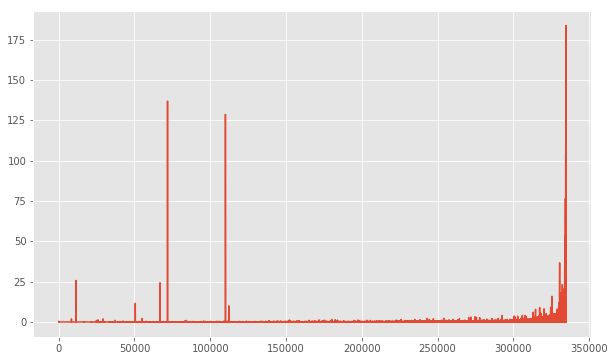

In [134]:
merchants['numerical_1'].plot(kind='line',figsize=(10,6))

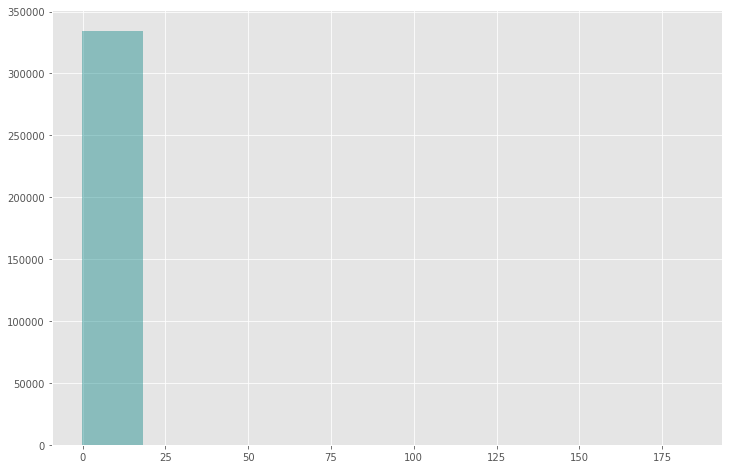

In [135]:
plt.figure(figsize=(12,8))
sns.distplot(merchants['numerical_1'].values, bins=10, kde=False, color="teal")
plt.show()

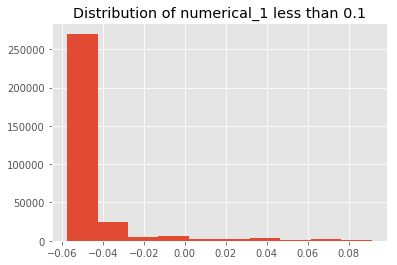

In [136]:
plt.hist(merchants.loc[merchants['numerical_1'] < 0.1, 'numerical_1']);
plt.title('Distribution of numerical_1 less than 0.1');

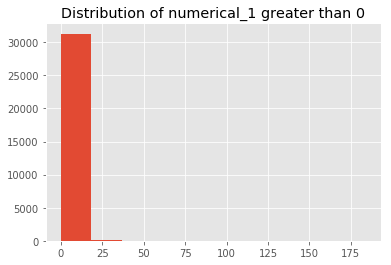

In [137]:
plt.hist(merchants.loc[merchants['numerical_1'] > 0, 'numerical_1']);
plt.title('Distribution of numerical_1 greater than 0');

**numerical_2**

In [138]:
merchants['numerical_2'].describe()

count    334696.000000
mean          0.008103
std           1.070497
min          -0.057471
25%          -0.057471
50%          -0.057471
75%          -0.047556
max         182.079322
Name: numerical_2, dtype: float64

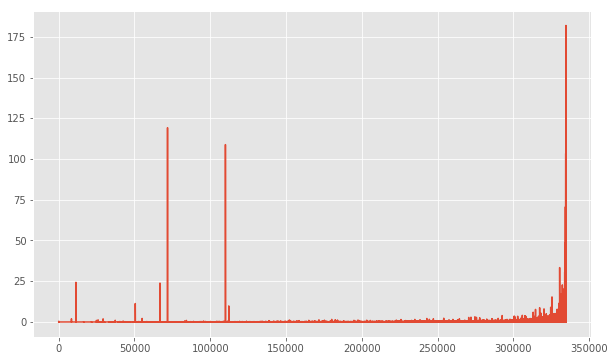

In [139]:
merchants['numerical_2'].plot(kind='line',figsize=(10,6))

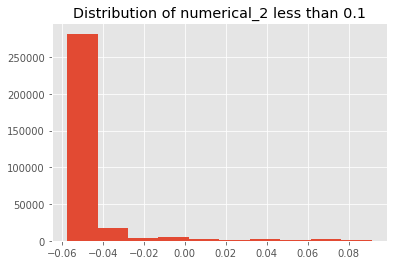

In [140]:
plt.hist(merchants.loc[merchants['numerical_2'] < 0.1, 'numerical_2']);
plt.title('Distribution of numerical_2 less than 0.1');

**Category_1**

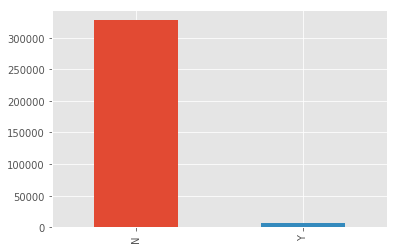

In [141]:
merchants['category_1'].value_counts().plot(kind='bar')

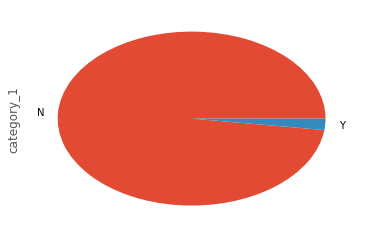

In [142]:
merchants['category_1'].value_counts().plot(kind='pie')

**category_2**

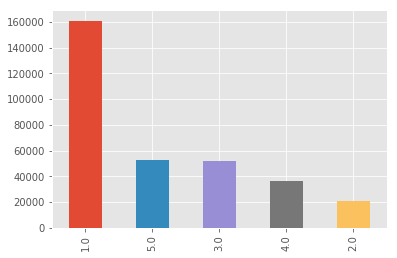

In [143]:
merchants['category_2'].value_counts().plot(kind='bar')

**category_4**

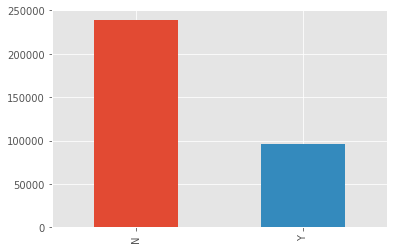

In [144]:
merchants['category_4'].value_counts().plot(kind='bar')

**Most recent sales range**

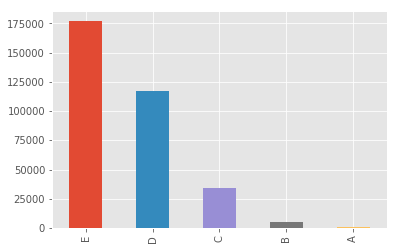

In [145]:
merchants['most_recent_sales_range'].value_counts().plot(kind='bar')

**most_recent_purchases_range**

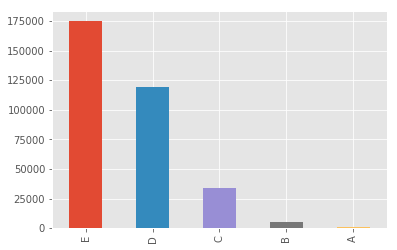

In [146]:
merchants['most_recent_purchases_range'].value_counts().plot(kind='bar')

**active_months_lag3**

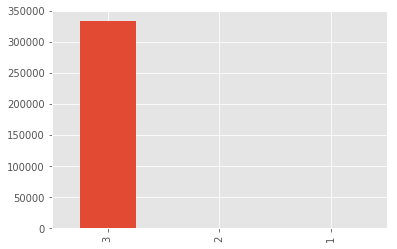

In [147]:
merchants['active_months_lag3'].value_counts().plot(kind='bar')

In [148]:
merchants['active_months_lag3'].value_counts()

3    333262
2       896
1       538
Name: active_months_lag3, dtype: int64

**** 	avg_purchases_lag3****

In [149]:
merchants['avg_purchases_lag3'].describe()

count    3.346960e+05
mean              inf
std               NaN
min      3.334953e-01
25%      9.236499e-01
50%      1.016667e+00
75%      1.146522e+00
max               inf
Name: avg_purchases_lag3, dtype: float64

In [150]:
merchants['avg_purchases_lag3'].isnull().sum()

0

In [151]:
merchants.loc[merchants['avg_purchases_lag3']==np.inf,'avg_purchases_lag3'] = 0

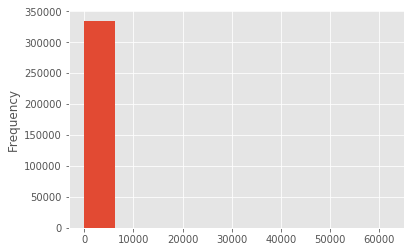

In [152]:
merchants['avg_purchases_lag3'].plot(kind='hist')

In [153]:
merchants['avg_purchases_lag3'].describe()

count    334696.000000
mean          1.590748
std         107.186579
min           0.000000
25%           0.923642
50%           1.016667
75%           1.146520
max       61851.333333
Name: avg_purchases_lag3, dtype: float64

In [154]:
merchants.loc[merchants['avg_purchases_lag3']<10,'avg_purchases_lag3'].value_counts().sum()/len(merchants['avg_purchases_lag3'])

0.9928323015512585

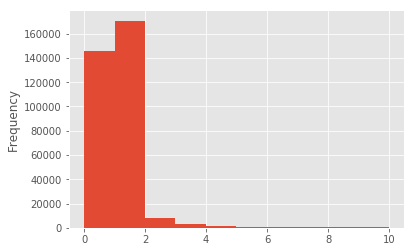

In [155]:
merchants.loc[merchants['avg_purchases_lag3']<10,'avg_purchases_lag3'].plot(kind='hist')

**avg_purchases_lag6**

In [156]:
merchants.loc[merchants['avg_purchases_lag6']==np.inf,'avg_purchases_lag6'] = 0
merchants.loc[merchants['avg_purchases_lag6']==np.nan,'avg_purchases_lag6'] = 0

In [157]:
merchants['avg_purchases_lag6'].describe()

count    334696.000000
mean          1.887551
std          97.862352
min           0.000000
25%           0.902238
50%           1.026961
75%           1.215556
max       56077.500000
Name: avg_purchases_lag6, dtype: float64

In [158]:
merchants.loc[merchants['avg_purchases_lag6']<10,'avg_purchases_lag6'].value_counts().sum()/len(merchants['avg_purchases_lag6'])

0.9873945311566317

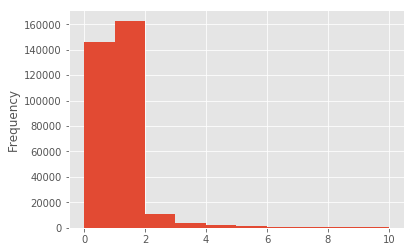

In [159]:
merchants.loc[merchants['avg_purchases_lag6']<10,'avg_purchases_lag6'].plot(kind='hist')

**avg purchases lag12**

In [160]:
merchants.loc[merchants['avg_purchases_lag12']==np.inf,'avg_purchases_lag12'] = 0
merchants.loc[merchants['avg_purchases_lag12']==np.nan,'avg_purchases_lag12'] = 0

In [161]:
merchants['avg_purchases_lag12'].describe()

count    334696.000000
mean          2.079177
std          88.441988
min           0.000000
25%           0.898333
50%           1.043360
75%           1.266451
max       50215.555556
Name: avg_purchases_lag12, dtype: float64

In [162]:
merchants.loc[merchants['avg_purchases_lag12']<10,'avg_purchases_lag12'].value_counts().sum()/len(merchants['avg_purchases_lag12'])

0.9843499772928269

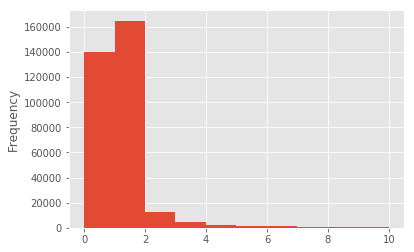

In [163]:
merchants.loc[merchants['avg_purchases_lag12']<10,'avg_purchases_lag12'].plot(kind='hist')

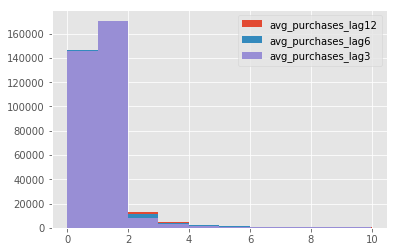

In [164]:
plt.hist(merchants.loc[(merchants['avg_purchases_lag12'] < 10) , 'avg_purchases_lag12'].fillna(0), label='avg_purchases_lag12');
plt.hist(merchants.loc[(merchants['avg_purchases_lag6'] < 10) , 'avg_purchases_lag6'].fillna(0), label='avg_purchases_lag6');
plt.hist(merchants.loc[(merchants['avg_purchases_lag3'] < 10) , 'avg_purchases_lag3'].fillna(0), label='avg_purchases_lag3');
plt.legend();

**avg_sales_lag**

In [165]:
merchants.loc[merchants['avg_sales_lag12']==np.inf,'avg_sales_lag12'] = 0
merchants.loc[merchants['avg_sales_lag12']==np.nan,'avg_sales_lag12'] = 0
merchants.loc[merchants['avg_sales_lag6']==np.inf,'avg_sales_lag6'] = 0
merchants.loc[merchants['avg_sales_lag6']==np.nan,'avg_sales_lag6'] = 0
merchants.loc[merchants['avg_sales_lag3']==np.inf,'avg_sales_lag3'] = 0
merchants.loc[merchants['avg_sales_lag3']==np.nan,'avg_sales_lag3'] = 0

In [166]:
merchants['avg_sales_lag12'].describe()

count    3.346830e+05
mean     2.522771e+01
std      5.251842e+03
min     -8.213000e+01
25%      8.500000e-01
50%      1.020000e+00
75%      1.290000e+00
max      2.567408e+06
Name: avg_sales_lag12, dtype: float64

In [167]:
merchants['avg_sales_lag6'].describe()

count    3.346830e+05
mean     2.165079e+01
std      3.947108e+03
min     -8.213000e+01
25%      8.500000e-01
50%      1.010000e+00
75%      1.230000e+00
max      1.513959e+06
Name: avg_sales_lag6, dtype: float64

In [168]:
merchants['avg_sales_lag3'].describe()

count    334683.000000
mean         13.832993
std        2395.489999
min         -82.130000
25%           0.880000
50%           1.000000
75%           1.160000
max      851844.640000
Name: avg_sales_lag3, dtype: float64

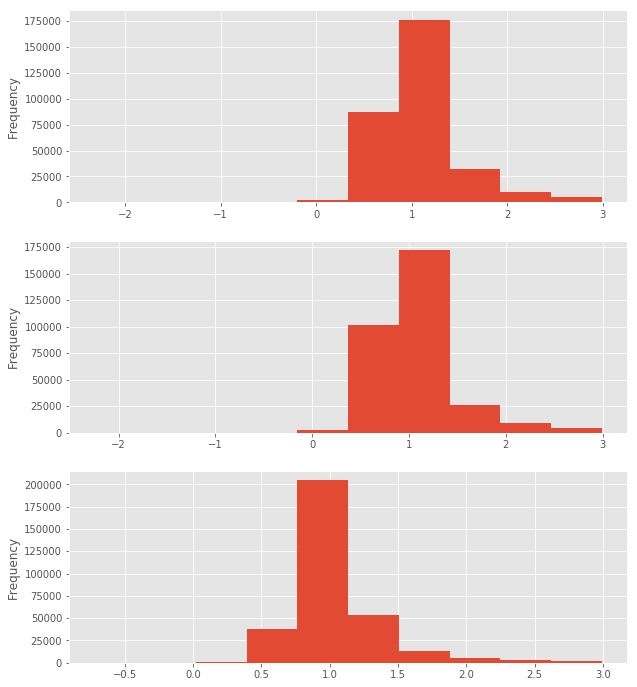

In [169]:
f,ax = plt.subplots(3,1,figsize=(10,12))
merchants.loc[(merchants['avg_sales_lag12']<3) & (merchants['avg_sales_lag12']>-10),'avg_sales_lag12'].plot(
    kind='hist',ax=ax[0])
merchants.loc[(merchants['avg_sales_lag6']<3) & (merchants['avg_sales_lag6']>-10),'avg_sales_lag6'].plot(
    kind='hist',ax=ax[1])
merchants.loc[(merchants['avg_sales_lag3']<3) & (merchants['avg_sales_lag3']>-10),'avg_sales_lag3'].plot(
    kind='hist',ax=ax[2])
plt.show()

In [170]:
his_tran.columns.values

array(['authorized_flag', 'card_id', 'city_id', 'category_1',
       'installments', 'category_3', 'merchant_category_id',
       'merchant_id', 'month_lag', 'purchase_amount', 'purchase_date',
       'category_2', 'state_id', 'subsector_id'], dtype=object)

In [171]:
his_tran['purchase_date'] = pd.to_datetime(his_tran['purchase_date'])

In [172]:
gc.collect()

4303

In [173]:
his_tran['card_id'] = his_tran['card_id'].astype('category')

In [174]:
gc.collect()

0

In [175]:
his_tran['category_1'] = his_tran['category_1'].astype('category')
his_tran['merchant_id'] = his_tran['merchant_id'].astype('category')

In [176]:
del his_tran
gc.collect()

29

In [177]:
new_tran = pd.read_csv('../input/new_merchant_transactions.csv')

In [178]:
new_tran.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


In [179]:
new_tran.shape

(1963031, 14)

In [180]:
new_tran['authorized_flag'].value_counts()

Y    1963031
Name: authorized_flag, dtype: int64

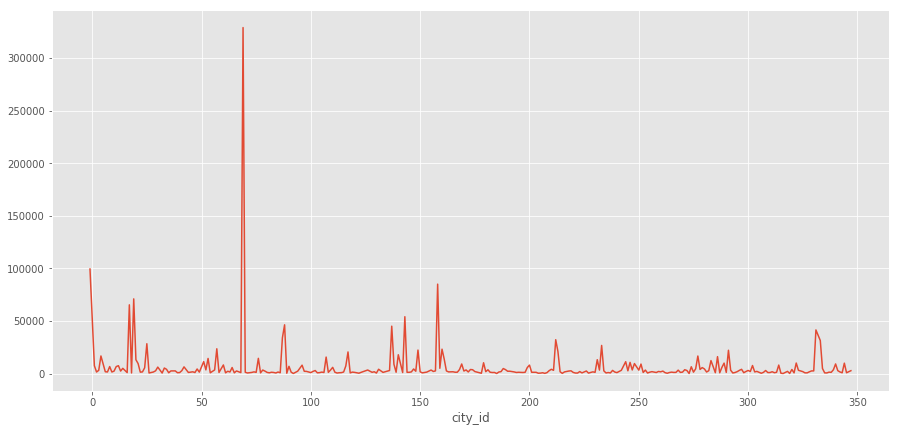

In [181]:
fig, ax = plt.subplots(figsize=(15,7))
new_tran.groupby(['city_id']).count()['purchase_amount'].plot(ax = ax)

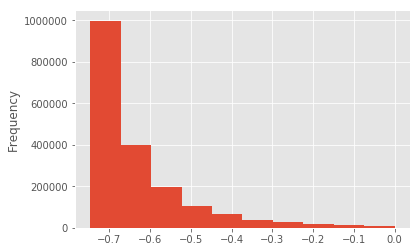

In [182]:
new_tran.loc[new_tran['purchase_amount']<0,'purchase_amount'].plot(kind='hist')

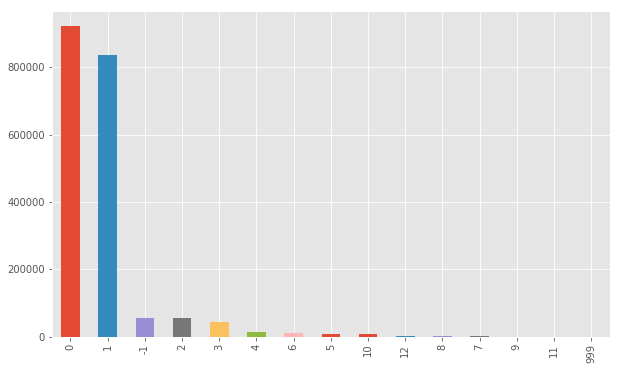

In [183]:
new_tran.installments.value_counts().plot(kind='bar',figsize=(10,6))

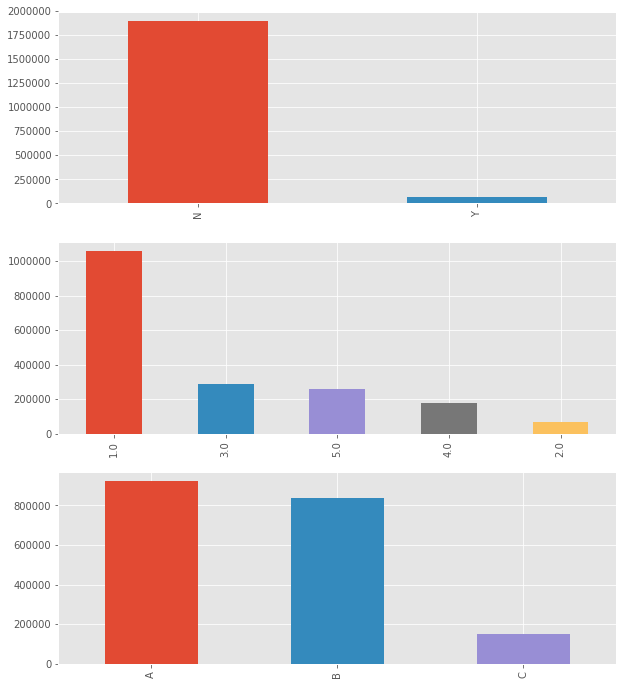

In [184]:
f,ax = plt.subplots(3,1,figsize=(10,12))
new_tran['category_1'].value_counts().plot(kind='bar',ax=ax[0])
new_tran['category_2'].value_counts().plot(kind='bar',ax=ax[1])
new_tran['category_3'].value_counts().plot(kind='bar',ax=ax[2])

The public score that we got is 3.906. Let's now add new transactions the same way as historical transactions and see if accuracy improves

In [185]:
new_tran.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


In [186]:
new_tran.isnull().sum()

authorized_flag              0
card_id                      0
city_id                      0
category_1                   0
installments                 0
category_3               55922
merchant_category_id         0
merchant_id              26216
month_lag                    0
purchase_amount              0
purchase_date                0
category_2              111745
state_id                     0
subsector_id                 0
dtype: int64

In [187]:
new_tran['category_2'].fillna(1.0,inplace=True)
new_tran['category_3'].fillna('A',inplace=True)

In [188]:
new_tran.isnull().sum()

authorized_flag             0
card_id                     0
city_id                     0
category_1                  0
installments                0
category_3                  0
merchant_category_id        0
merchant_id             26216
month_lag                   0
purchase_amount             0
purchase_date               0
category_2                  0
state_id                    0
subsector_id                0
dtype: int64

In [189]:
t_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,purchase_count,installments_x,installments_y,unauthorized_count,authorized_count,city_id,purchase_amount,category_1,N,Y,category_2,1.0_x,2.0_x,3.0,4.0,5.0,category_3,-1_x,0_x,1_y,2_y,month_lag,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1_y,0_y
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,260,4,0.015385,13.0,247.0,260,-165.968739,0,260.0,0.0,5.0,257.0,0.0,0.0,0.0,3.0,1,0.0,256.0,4.0,0.0,-1017,0.0,0.0,0.0,0.0,0.0,3.0,49.0,44.0,20.0,22.0,21.0,57.0,21.0,23.0
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,350,543,1.551429,11.0,339.0,350,-210.006336,1,319.0,31.0,1.0,319.0,0.0,0.0,0.0,0.0,2,2.0,0.0,276.0,72.0,-1761,0.0,21.0,22.0,13.0,18.0,15.0,34.0,49.0,14.0,24.0,26.0,16.0,47.0,51.0
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,43,0,0.000000,2.0,41.0,43,-29.167391,0,43.0,0.0,5.0,4.0,0.0,0.0,0.0,39.0,0,0.0,43.0,0.0,0.0,-370,6.0,6.0,5.0,7.0,4.0,0.0,2.0,2.0,1.0,6.0,0.0,1.0,2.0,1.0
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,77,84,1.090909,0.0,77.0,77,-49.491364,1,65.0,12.0,4.0,12.0,0.0,0.0,53.0,0.0,2,2.0,0.0,68.0,7.0,-218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,31.0,7.0,6.0,6.0,16.0
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,133,182,1.368421,5.0,128.0,133,-48.687656,1,118.0,15.0,5.0,10.0,0.0,0.0,107.0,1.0,2,0.0,0.0,126.0,7.0,-171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,31.0,46.0,35.0


In [190]:
t_df.rename({
    'installments_x':'installments_x_1',
    'installments_y':'installments_x_2'
},axis='columns',inplace=True)

In [191]:
def add_new_transaction_features_to_test():
    t_df = pd.merge(test_tdf,pd.DataFrame(new_tran.groupby(['card_id']).count()['purchase_amount']),on='card_id',how='left')
    t_df = t_df.rename({'purchase_amount':'purchase_count'}, axis='columns')
    t_df = pd.merge(t_df,pd.DataFrame(new_tran.groupby(['card_id']).sum()['installments']),on='card_id',how='left',suffixes=('_a','_b'))
    t_df = pd.merge(t_df,pd.DataFrame(new_tran.groupby(['card_id']).mean()['installments']),on='card_id',how='left',suffixes=('_a','_b'))
    t_df = pd.merge(t_df,pd.DataFrame(new_tran.groupby(['card_id']).count()['city_id']),on='card_id',how='left')
    t_df = pd.merge(t_df,pd.DataFrame(new_tran.groupby(['card_id']).sum()['purchase_amount']),on='card_id',how='left')
    t_df = pd.merge(t_df,pd.DataFrame(new_tran[['card_id','category_1']].groupby(['card_id']).max()),on='card_id',how='left')
    t_df = pd.merge(t_df,pd.DataFrame(new_tran[['card_id','category_2']].groupby(['card_id']).max()),on='card_id',how='left')
    t_df = pd.merge(t_df,pd.DataFrame(new_tran[['card_id','category_3']].groupby(['card_id']).max()),on='card_id',how='left')
    t_df = pd.merge(t_df,pd.DataFrame(new_tran.groupby(['card_id']).sum()['month_lag']),on='card_id',how='left')
    return t_df

In [192]:
new_test_tdf = add_new_transaction_features_to_test()

In [193]:
new_test_tdf.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,purchase_count,installments_x,installments_y,unauthorized_count,authorized_count,city_id_x,purchase_amount_x,category_1_x,N,Y,category_2_x,1.0_x,2.0_x,3.0,4.0,5.0,category_3_x,-1_x,0_x,1_y,2_y,month_lag_x,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1_y,0_y,target,purchase_amount_y,installments_a,installments_b,city_id_y,purchase_amount,category_1_y,category_2_y,category_3_y,month_lag_y
0,2017-04,C_ID_0ab67a22ab,3,3,1,68,141,2.073529,24.0,44.0,68,-40.733733,1,45.0,23.0,1.0,45.0,0.0,0.0,0.0,0.0,2,0.0,0.0,46.0,22.0,-247,0.0,0.0,0.0,0.0,0.0,4.0,6.0,11.0,2.0,11.0,9.0,11.0,4.0,10.0,-4.400565,3.0,5.0,1.666667,3.0,-1.777156,N,1.0,C,6.0
1,2017-01,C_ID_130fd0cbdd,2,3,0,78,83,1.064103,1.0,77.0,78,-49.136513,1,76.0,2.0,4.0,0.0,0.0,1.0,75.0,0.0,2,0.0,0.0,76.0,2.0,-812,11.0,11.0,14.0,23.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.030054,9.0,11.0,1.222222,9.0,-5.944698,Y,4.0,C,13.0
2,2017-08,C_ID_b709037bc5,5,1,1,13,44,3.384615,4.0,9.0,13,4.528840,1,12.0,1.0,5.0,1.0,0.0,0.0,0.0,11.0,2,3.0,0.0,1.0,9.0,-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,3.0,2.0,3.0,0.023665,2.0,11.0,5.500000,2.0,0.180138,Y,5.0,C,2.0
3,2017-12,C_ID_d27d835a9f,2,1,0,26,38,1.461538,0.0,26.0,26,-13.690715,0,26.0,0.0,1.0,26.0,0.0,0.0,0.0,0.0,2,2.0,0.0,17.0,7.0,-32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,2.0,9.0,-0.001983,10.0,29.0,2.900000,10.0,-5.743674,Y,5.0,C,13.0
4,2015-12,C_ID_2b5e3df5c2,5,1,1,110,120,1.090909,23.0,87.0,110,25.139384,0,110.0,0.0,4.0,4.0,0.0,5.0,101.0,0.0,2,0.0,0.0,104.0,6.0,-685,9.0,2.0,18.0,8.0,8.0,2.0,8.0,5.0,7.0,10.0,1.0,5.0,4.0,23.0,-0.364747,6.0,5.0,0.833333,6.0,12.064997,N,4.0,C,7.0


In [194]:
new_test_tdf.drop('target',inplace=True,axis=1)

In [195]:
new_test_tdf.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,purchase_count,installments_x,installments_y,unauthorized_count,authorized_count,city_id_x,purchase_amount_x,category_1_x,N,Y,category_2_x,1.0_x,2.0_x,3.0,4.0,5.0,category_3_x,-1_x,0_x,1_y,2_y,month_lag_x,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1_y,0_y,purchase_amount_y,installments_a,installments_b,city_id_y,purchase_amount,category_1_y,category_2_y,category_3_y,month_lag_y
0,2017-04,C_ID_0ab67a22ab,3,3,1,68,141,2.073529,24.0,44.0,68,-40.733733,1,45.0,23.0,1.0,45.0,0.0,0.0,0.0,0.0,2,0.0,0.0,46.0,22.0,-247,0.0,0.0,0.0,0.0,0.0,4.0,6.0,11.0,2.0,11.0,9.0,11.0,4.0,10.0,3.0,5.0,1.666667,3.0,-1.777156,N,1.0,C,6.0
1,2017-01,C_ID_130fd0cbdd,2,3,0,78,83,1.064103,1.0,77.0,78,-49.136513,1,76.0,2.0,4.0,0.0,0.0,1.0,75.0,0.0,2,0.0,0.0,76.0,2.0,-812,11.0,11.0,14.0,23.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,9.0,11.0,1.222222,9.0,-5.944698,Y,4.0,C,13.0
2,2017-08,C_ID_b709037bc5,5,1,1,13,44,3.384615,4.0,9.0,13,4.528840,1,12.0,1.0,5.0,1.0,0.0,0.0,0.0,11.0,2,3.0,0.0,1.0,9.0,-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,3.0,2.0,3.0,2.0,11.0,5.500000,2.0,0.180138,Y,5.0,C,2.0
3,2017-12,C_ID_d27d835a9f,2,1,0,26,38,1.461538,0.0,26.0,26,-13.690715,0,26.0,0.0,1.0,26.0,0.0,0.0,0.0,0.0,2,2.0,0.0,17.0,7.0,-32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,2.0,9.0,10.0,29.0,2.900000,10.0,-5.743674,Y,5.0,C,13.0
4,2015-12,C_ID_2b5e3df5c2,5,1,1,110,120,1.090909,23.0,87.0,110,25.139384,0,110.0,0.0,4.0,4.0,0.0,5.0,101.0,0.0,2,0.0,0.0,104.0,6.0,-685,9.0,2.0,18.0,8.0,8.0,2.0,8.0,5.0,7.0,10.0,1.0,5.0,4.0,23.0,6.0,5.0,0.833333,6.0,12.064997,N,4.0,C,7.0


In [196]:
def add_new_transaction_features(df):
    t_df = pd.merge(df,pd.DataFrame(new_tran.groupby(['card_id']).count()['purchase_amount']),on='card_id',how='left')
    t_df = t_df.rename({'purchase_amount':'purchase_count'}, axis='columns')
    t_df = pd.merge(t_df,pd.DataFrame(new_tran.groupby(['card_id']).sum()['installments']),on='card_id',how='left')
    t_df = pd.merge(t_df,pd.DataFrame(new_tran.groupby(['card_id']).mean()['installments']),on='card_id',how='left')
    t_df = pd.merge(t_df,pd.DataFrame(new_tran.groupby(['card_id']).count()['city_id']),on='card_id',how='left')
    t_df = pd.merge(t_df,pd.DataFrame(new_tran.groupby(['card_id']).sum()['purchase_amount']),on='card_id',how='left')
    t_df = pd.merge(t_df,pd.DataFrame(new_tran[['card_id','category_1']].groupby(['card_id']).max()),on='card_id',how='left')
    t_df = pd.merge(t_df,pd.DataFrame(new_tran[['card_id','category_2']].groupby(['card_id']).max()),on='card_id',how='left')
    t_df = pd.merge(t_df,pd.DataFrame(new_tran[['card_id','category_3']].groupby(['card_id']).max()),on='card_id',how='left')
    t_df = pd.merge(t_df,pd.DataFrame(new_tran.groupby(['card_id']).sum()['month_lag']),on='card_id',how='left')
    return t_df

In [197]:
t_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,purchase_count,installments_x_1,installments_x_2,unauthorized_count,authorized_count,city_id,purchase_amount,category_1,N,Y,category_2,1.0_x,2.0_x,3.0,4.0,5.0,category_3,-1_x,0_x,1_y,2_y,month_lag,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1_y,0_y
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,260,4,0.015385,13.0,247.0,260,-165.968739,0,260.0,0.0,5.0,257.0,0.0,0.0,0.0,3.0,1,0.0,256.0,4.0,0.0,-1017,0.0,0.0,0.0,0.0,0.0,3.0,49.0,44.0,20.0,22.0,21.0,57.0,21.0,23.0
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,350,543,1.551429,11.0,339.0,350,-210.006336,1,319.0,31.0,1.0,319.0,0.0,0.0,0.0,0.0,2,2.0,0.0,276.0,72.0,-1761,0.0,21.0,22.0,13.0,18.0,15.0,34.0,49.0,14.0,24.0,26.0,16.0,47.0,51.0
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,43,0,0.000000,2.0,41.0,43,-29.167391,0,43.0,0.0,5.0,4.0,0.0,0.0,0.0,39.0,0,0.0,43.0,0.0,0.0,-370,6.0,6.0,5.0,7.0,4.0,0.0,2.0,2.0,1.0,6.0,0.0,1.0,2.0,1.0
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,77,84,1.090909,0.0,77.0,77,-49.491364,1,65.0,12.0,4.0,12.0,0.0,0.0,53.0,0.0,2,2.0,0.0,68.0,7.0,-218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,31.0,7.0,6.0,6.0,16.0
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,133,182,1.368421,5.0,128.0,133,-48.687656,1,118.0,15.0,5.0,10.0,0.0,0.0,107.0,1.0,2,0.0,0.0,126.0,7.0,-171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,31.0,46.0,35.0


In [198]:
new_train_tdf = add_new_transaction_features(t_df)

In [199]:
new_train_tdf.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,purchase_count,installments_x_1,installments_x_2,unauthorized_count,authorized_count,city_id_x,purchase_amount_x,category_1_x,N,Y,category_2_x,1.0_x,2.0_x,3.0,4.0,5.0,category_3_x,-1_x,0_x,1_y,2_y,month_lag_x,-13,-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1_y,0_y,purchase_amount_y,installments_x,installments_y,city_id_y,purchase_amount,category_1_y,category_2_y,category_3_y,month_lag_y
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,260,4,0.015385,13.0,247.0,260,-165.968739,0,260.0,0.0,5.0,257.0,0.0,0.0,0.0,3.0,1,0.0,256.0,4.0,0.0,-1017,0.0,0.0,0.0,0.0,0.0,3.0,49.0,44.0,20.0,22.0,21.0,57.0,21.0,23.0,23.0,0.0,0.000000,23.0,-13.244202,N,1.0,A,34.0
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913,350,543,1.551429,11.0,339.0,350,-210.006336,1,319.0,31.0,1.0,319.0,0.0,0.0,0.0,0.0,2,2.0,0.0,276.0,72.0,-1761,0.0,21.0,22.0,13.0,18.0,15.0,34.0,49.0,14.0,24.0,26.0,16.0,47.0,51.0,6.0,6.0,1.000000,6.0,-4.355735,N,1.0,B,9.0
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056,43,0,0.000000,2.0,41.0,43,-29.167391,0,43.0,0.0,5.0,4.0,0.0,0.0,0.0,39.0,0,0.0,43.0,0.0,0.0,-370,6.0,6.0,5.0,7.0,4.0,0.0,2.0,2.0,1.0,6.0,0.0,1.0,2.0,1.0,1.0,0.0,0.000000,1.0,-0.700326,N,5.0,A,2.0
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495,77,84,1.090909,0.0,77.0,77,-49.491364,1,65.0,12.0,4.0,12.0,0.0,0.0,53.0,0.0,2,2.0,0.0,68.0,7.0,-218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,31.0,7.0,6.0,6.0,16.0,7.0,5.0,0.714286,7.0,-4.654372,Y,4.0,B,12.0
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749,133,182,1.368421,5.0,128.0,133,-48.687656,1,118.0,15.0,5.0,10.0,0.0,0.0,107.0,1.0,2,0.0,0.0,126.0,7.0,-171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,31.0,46.0,35.0,36.0,35.0,0.972222,36.0,-19.926237,Y,4.0,C,56.0


In [200]:
new_train_tdf.shape

(201917, 51)

In [201]:
new_test_tdf.shape

(123623, 50)

In [202]:
new_train_tdf.isnull().sum()

first_active_month        0
card_id                   0
feature_1                 0
feature_2                 0
feature_3                 0
target                    0
purchase_count            0
installments_x_1          0
installments_x_2          0
unauthorized_count        0
authorized_count          0
city_id_x                 0
purchase_amount_x         0
category_1_x              0
N                         0
Y                         0
category_2_x              0
1.0_x                     0
2.0_x                     0
3.0                       0
4.0                       0
5.0                       0
category_3_x              0
-1_x                      0
0_x                       0
1_y                       0
2_y                       0
month_lag_x               0
-13                       0
-12                       0
-11                       0
-10                       0
-9                        0
-8                        0
-7                        0
-6                  

In [203]:
new_train_tdf.loc[new_train_tdf['purchase_amount_y'].isnull(),'purchase_amount_y'] = 0.0
new_train_tdf.loc[new_train_tdf['installments_x'].isnull(),'installments_x'] = 0.0
new_train_tdf.loc[new_train_tdf['installments_y'].isnull(),'installments_y'] = 0.0
new_train_tdf.loc[new_train_tdf['city_id_y'].isnull(),'city_id_y'] = 0.0
new_train_tdf.loc[new_train_tdf['purchase_amount'].isnull(),'purchase_amount'] = 0.0
new_train_tdf.loc[new_train_tdf['category_1_y'].isnull(),'category_1_y'] = 'N'
new_train_tdf.loc[new_train_tdf['category_2_y'].isnull(),'category_2_y'] = 1
new_train_tdf.loc[new_train_tdf['category_3_y'].isnull(),'category_3_y'] = 'A'
new_train_tdf.loc[new_train_tdf['month_lag_y'].isnull(),'month_lag_y'] = 0.0

In [204]:
new_train_tdf['category_1_y'] = new_train_tdf['category_1_y'].astype('category')
new_train_tdf['category_1_y'] = new_train_tdf['category_1_y'].cat.codes
new_train_tdf['category_3_y'] = new_train_tdf['category_3_y'].astype('category')
new_train_tdf['category_3_y'] = new_train_tdf['category_3_y'].cat.codes

In [205]:
new_train_tdf.reset_index(drop=True,inplace=True)

In [206]:
new_train_tdf['diff_purchase_count'] = new_train_tdf['purchase_count'] - new_train_tdf['purchase_amount_y']
new_train_tdf['diff_installment'] = new_train_tdf['installments_x_1'] - new_train_tdf['installments_x']
new_train_tdf['total_purchases'] = new_train_tdf['purchase_count'] + new_train_tdf['purchase_amount_y']
new_train_tdf['diff_city'] = new_train_tdf['city_id_x'] - new_train_tdf['city_id_y']
new_train_tdf['diff_purchase_amount'] = new_train_tdf['purchase_amount_x'] - new_train_tdf['purchase_amount']

In [207]:
new_train_tdf = new_train_tdf[new_train_tdf['target']>-30]

In [208]:
features = new_train_tdf.columns.drop(['first_active_month','card_id','target']).values

In [209]:
features

array(['feature_1', 'feature_2', 'feature_3', 'purchase_count',
       'installments_x_1', 'installments_x_2', 'unauthorized_count',
       'authorized_count', 'city_id_x', 'purchase_amount_x',
       'category_1_x', 'N', 'Y', 'category_2_x', '1.0_x', '2.0_x', 3.0,
       4.0, 5.0, 'category_3_x', '-1_x', '0_x', '1_y', '2_y',
       'month_lag_x', -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2,
       '-1_y', '0_y', 'purchase_amount_y', 'installments_x',
       'installments_y', 'city_id_y', 'purchase_amount', 'category_1_y',
       'category_2_y', 'category_3_y', 'month_lag_y',
       'diff_purchase_count', 'diff_installment', 'total_purchases',
       'diff_city', 'diff_purchase_amount'], dtype=object)

In [210]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_train_tdf[features], new_train_tdf['target'], test_size = 0.25, random_state = 0)

In [211]:
d_train = lgb.Dataset(x_train, label=y_train)

In [212]:
params = {}
params['learning_rate'] = 0.005
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
#params['bagging_fraction'] = 0.7
#params['bagging_freq'] = 100
params['metric'] = 'rmse'
params['sub_feature'] = 0.78
params['num_leaves'] = 87
params['min_data'] = 488
params['max_depth'] = 33

In [213]:
clf = lgb.train(params, d_train, 2000)

In [214]:
y_pred = clf.predict(x_test)

In [215]:
mse = mean_squared_error(y_test, y_pred)

In [216]:
print(mse**0.5)

1.5847650772632014


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


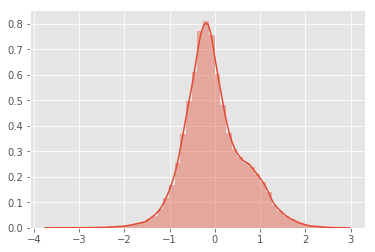

In [217]:
sns.distplot(y_pred)

In [218]:
y_pred2 = clf.predict(x_train)

In [219]:
mse2 = mean_squared_error(y_train,y_pred2)

In [220]:
print(mse2**0.5)

1.524375250186194


In [221]:
d_train2 = lgb.Dataset(new_train_tdf[features], label=new_train_tdf['target'])

In [222]:
clf = lgb.train(params, d_train2, 2000)

In [223]:
new_test_tdf.isnull().sum()

first_active_month        1
card_id                   0
feature_1                 0
feature_2                 0
feature_3                 0
purchase_count            0
installments_x            0
installments_y            0
unauthorized_count        0
authorized_count          0
city_id_x                 0
purchase_amount_x         0
category_1_x              0
N                         0
Y                         0
category_2_x              0
1.0_x                     0
2.0_x                     0
3.0                       0
4.0                       0
5.0                       0
category_3_x              0
-1_x                      0
0_x                       0
1_y                       0
2_y                       0
month_lag_x               0
-13                       0
-12                       0
-11                       0
-10                       0
-9                        0
-8                        0
-7                        0
-6                        0
-5                  

In [224]:
new_test_tdf.loc[new_test_tdf['purchase_amount_y'].isnull(),'purchase_amount_y'] = 0.0
new_test_tdf.loc[new_test_tdf['installments_a'].isnull(),'installments_a'] = 0.0
new_test_tdf.loc[new_test_tdf['installments_b'].isnull(),'installments_b'] = 0.0
new_test_tdf.loc[new_test_tdf['city_id_y'].isnull(),'city_id_y'] = 0.0
new_test_tdf.loc[new_test_tdf['purchase_amount'].isnull(),'purchase_amount'] = 0.0
new_test_tdf.loc[new_test_tdf['category_1_y'].isnull(),'category_1_y'] = 'N'
new_test_tdf.loc[new_test_tdf['category_2_y'].isnull(),'category_2_y'] = 1
new_test_tdf.loc[new_test_tdf['category_3_y'].isnull(),'category_3_y'] = 'A'
new_test_tdf.loc[new_test_tdf['month_lag_y'].isnull(),'month_lag_y'] = 0.0

In [225]:
new_test_tdf['category_1_y'] = new_test_tdf['category_1_y'].astype('category')
new_test_tdf['category_1_y'] = new_test_tdf['category_1_y'].cat.codes
new_test_tdf['category_3_y'] = new_test_tdf['category_3_y'].astype('category')
new_test_tdf['category_3_y'] = new_test_tdf['category_3_y'].cat.codes

In [226]:
new_test_tdf['diff_purchase_count'] = new_test_tdf['purchase_count'] - new_test_tdf['purchase_amount_y']
new_test_tdf['diff_installment'] = new_test_tdf['installments_x'] - new_test_tdf['installments_a']
new_test_tdf['total_purchases'] = new_test_tdf['purchase_count'] + new_test_tdf['purchase_amount_y']
new_test_tdf['diff_city'] = new_test_tdf['city_id_x'] - new_test_tdf['city_id_y']
new_test_tdf['diff_purchase_amount'] = new_test_tdf['purchase_amount_x'] - new_test_tdf['purchase_amount']

In [227]:
features_test = new_test_tdf.columns.drop(['card_id','first_active_month'])

In [228]:
new_test_tdf['target'] = clf.predict(new_test_tdf[features_test])

In [229]:
new_test_tdf[['card_id','target']].to_csv('sub2.csv',index=False)